In [1]:
from fb import ForestBoostingRegressor
from fb import ForestBoostingClassifier

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble._forest import ForestClassifier 
from sklearn.utils.validation import check_is_fitted, check_X_y, check_array, column_or_1d

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier, plot_tree  

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_random_state

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm 
import time 
import math 
import multiprocessing 
from concurrent.futures import ProcessPoolExecutor 
from sklearn.base import  clone 
from joblib import Parallel, delayed

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import roc_auc_score 

# ForestBoostingClassifier

## Пример использования на give_me_some_credit

In [6]:
# give_me_some_credit
X = pd.read_csv( 'https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar5/data/give_me_some_credit.csv', 
    index_col=0)
X = X.groupby('SeriousDlqin2yrs').sample(n=X['SeriousDlqin2yrs'].value_counts().min(), random_state=42).dropna().reset_index(drop=True) 
y = X['SeriousDlqin2yrs'] 
X = X.drop(['SeriousDlqin2yrs'], axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# standart algoritms
rf_model = RandomForestClassifier(n_estimators=40, max_depth=5, max_features= 'sqrt', random_state = 0)
rf_model.fit(X_train, y_train)
print(f"ROC AUC RandomForestClassifier: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,-1] )}")


gb_model = GradientBoostingClassifier(n_estimators=40, max_depth=5, max_features='sqrt', random_state = 0)
gb_model.fit(X_train, y_train)  
print(f"ROC AUC GradientBoostingClassifier: {roc_auc_score(y_test,  gb_model.predict_proba(X_test)[:,-1])}") 

# gibrid algoritm
rb_model = ForestBoostingClassifier(n_estimators=20, n_gb_estimators=2, max_depth =  5, learning_rate = 1, max_features = 'sqrt', random_state = 0)  
rb_model.fit(X_train, y_train) 
print(f"ROC AUC ForestBoostingClassifier : {roc_auc_score(y_test, rb_model.predict_proba(X_test)[:,-1])}") 

ROC AUC RandomForestClassifier: 0.8441907228058291
ROC AUC GradientBoostingClassifier: 0.8512688434185642
ROC AUC RandomBoostingClassifier : 0.847551414101347


### Пример настройки (тюнинг моделей)

In [7]:
# standart algoritms
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt'] 
}
model = RandomForestClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1,  refit = False )
grid_search.fit(X,y)
print("Лучшие параметры:", grid_search.best_params_)
print("ROC AUC RandomForestClassifier: ", grid_search.best_score_ ) 

param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'learning_rate': np.linspace(0, 1, 20),
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt'] 
} 
model = GradientBoostingClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1, refit = False )
grid_search.fit(X,y)
print("\nЛучшие параметры:", grid_search.best_params_)
print("ROC AUC GradientBoostingClassifier: ", grid_search.best_score_)  

# gibrid algoritm
param_grid = {
    'n_estimators': [ 5, 10, 20],
    'n_gb_estimators': [1, 2, 3, 4, 5],
    'learning_rate': np.linspace(0, 1, 20),
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt'] 
}
model = ForestBoostingClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1, refit = False )
grid_search.fit(X,y)
print("\nЛучшие параметры:", grid_search.best_params_)
print("ROC AUC ForestBoostingClassifier: ", grid_search.best_score_ )

Лучшие параметры: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 20}
ROC AUC RandomForestClassifier:  0.9891430378412565

Лучшие параметры: {'learning_rate': 0.42105263157894735, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 30}
ROC AUC GradientBoostingClassifier:  0.9914620006324444

Лучшие параметры: {'learning_rate': 0.8421052631578947, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 5, 'n_gb_estimators': 4}
ROC AUC RandomBoostingClassifier:  0.9933593338252346


## Пример использования на breast_cancer

In [4]:
from sklearn.datasets import load_breast_cancer 

In [5]:
#breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names) 
y = data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify= y)

### Пример настройки (тюнинг)

In [6]:
# standart algoritms
param_grid = {
    'n_estimators': [230, 240, 245],
    'max_depth': [10, 12, 13],
    'max_features': ['sqrt'] 
}
model = RandomForestClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1,  refit = False )
grid_search.fit(X,y)
print("Лучшие параметры:", grid_search.best_params_)
print("ROC AUC RandomForestClassifier: ", grid_search.best_score_ ) 

param_grid = {
    'n_estimators': [70, 80, 90],
    'learning_rate': np.linspace(0, 1, 11),
    'max_depth': [5,6,7],
    'max_features': ['sqrt'] 
} 
model = GradientBoostingClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1, refit = False )
grid_search.fit(X,y)
print("\nЛучшие параметры:", grid_search.best_params_)
print("ROC AUC GradientBoostingClassifier: ", grid_search.best_score_)  

# gibrid algoritm
param_grid = {
    'n_estimators': [180, 190, 200],
    'n_gb_estimators': [9, 10, 11],
    'learning_rate': np.linspace(0, 1, 11),
    'max_depth': [6,7,8],
    'max_features': ['sqrt'] 
}
model = ForestBoostingClassifier(random_state=0) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=[(X_train.index, X_test.index)], 
                           scoring='roc_auc', n_jobs=-1, refit = False )
grid_search.fit(X,y)
print("\nЛучшие параметры:", grid_search.best_params_)
print("ROC AUC ForestBoostingClassifier: ", grid_search.best_score_ )

Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 245}
ROC AUC RandomForestClassifier:  0.9882997786444608

Лучшие параметры: {'learning_rate': 0.4, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 70}
ROC AUC GradientBoostingClassifier:  0.9915674080320439

Лучшие параметры: {'learning_rate': 0.30000000000000004, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'n_gb_estimators': 9}
ROC AUC ForestBoostingClassifier:  0.9886687045430589


## тестирование

In [9]:
def plot_curve_time_grid_best_params_n_n_gb1( 
    X, # датасет
    y, # целевая переменная
    n_gb_estimators_list, # list из n_gb_estimators по которым строятся кривые
    n_estimators_list, # лист числа моделей в ансамбле для кривых (для GradientBoosting n_estimators_list = 1, а число деревьев в моделях переберается из n_estimators_list)
    n_models, # число  запускаемых моделей после GridSearchCV для рассчета std
    n_jobs, # количество ядер для паралельного запуска моделей из n_models
    n_jobs_grid, # число ядер для GridSearchCV
    depths,  # массив глубин деревьев в моделях 
    amount_learning_rate, # количество равномерно-распределенных точек в [0,1] для поиска оптимального learning_rate в GridSearchCV
    w_l_r, # окно в промежутке [0,1] для поиска субоптимального значения learning_rate с центром в оптимальном значении learning_rate на прошлой итерации
    n_points # количество равномерно-распределенных точек в окне w_l_r (включая граничные) для рассчета субоптимального learning_rate
    ):

    X['y_'] = y
    X = X.reset_index(drop=True)
    y = X['y_']
    X = X.drop(['y_'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_states = np.random.default_rng(seed=42).integers(0, 2**32, size=n_models)

    def train_and_evaluate_model(model_class, param_grid_base, model_name, uses_n_gb_estimators, has_learning_rate):
        if uses_n_gb_estimators:
            mean_std_results = {}
            best_params_list = []
            training_times_list = []
            for n_gb_estimators in n_gb_estimators_list:
                mean_std_results[n_gb_estimators] = []
                total_iterations = len(n_estimators_list)
                with tqdm(total=total_iterations, desc=f'{model_name} n_gb={n_gb_estimators}') as pbar:
                    l_r_ = None  # Инициализация предыдущего значения learning_rate
                    for n_estimators in n_estimators_list:
                        param_grid = param_grid_base.copy()
                        param_grid['n_estimators'] = [n_estimators]
                        param_grid['n_gb_estimators'] = [n_gb_estimators]

                        if has_learning_rate:
                            if l_r_ is None:
                                # На первом шаге используем полный диапазон
                                param_grid['learning_rate'] = np.linspace(0.0, 1.0, amount_learning_rate + 1)
                            else:
                                lower = max(0.0, l_r_ - w_l_r)
                                upper = min(1.0, l_r_ + w_l_r)
                                param_grid['learning_rate'] = np.linspace(lower, upper, n_points)

                        model = model_class(random_state=0)
                        grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='roc_auc',
                            n_jobs=n_jobs_grid,
                            refit=False
                        )
                        grid_search.fit(X, y)
                        best_params = grid_search.best_params_
                        l_r_prev = l_r_
                        if has_learning_rate:
                            l_r_ = best_params['learning_rate']

                            # Проверяем, находится ли l_r_ на границе
                            if l_r_ == param_grid['learning_rate'][0] or l_r_ == param_grid['learning_rate'][-1]:
                                # Если на границе, повторяем поиск на полном диапазоне
                                param_grid['learning_rate'] = np.linspace(0.0, 1.0, amount_learning_rate + 1)
                                grid_search = GridSearchCV(
                                    estimator=model,
                                    param_grid=param_grid,
                                    cv=[(X_train.index, X_test.index)],
                                    scoring='roc_auc',
                                    n_jobs=n_jobs_grid,
                                    refit=False
                                )
                                grid_search.fit(X, y)
                                best_params = grid_search.best_params_
                                l_r_ = best_params['learning_rate']

                        best_params_entry = {'n_estimators': n_estimators, 'n_gb_estimators': n_gb_estimators, **best_params}
                        best_params_list.append(best_params_entry)

                        def train_model(i):
                            params = best_params.copy()
                            params['random_state'] = random_states[i]
                            params['n_jobs'] = 1
                            model_instance = model_class(**params)
                            start_time = time.time()
                            model_instance.fit(X_train, y_train)
                            end_time = time.time()
                            training_time = end_time - start_time
                            importance = model_instance.feature_importances_
                            y_pred_proba = model_instance.predict_proba(X_test)[:, 1]
                            roc_auc = roc_auc_score(y_test, y_pred_proba)
                            return training_time, importance, roc_auc

                        results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                        training_times, importance_list, roc_auc_scores = zip(*results)
                        importance_matrix = np.array(importance_list)

                        std_importance = np.std(importance_matrix, axis=0)
                        mean_std_importance = np.mean(std_importance)
                        mean_std_results[n_gb_estimators].append(mean_std_importance)

                        avg_training_time = np.mean(training_times)
                        mean_roc_auc = np.mean(roc_auc_scores)

                        training_times_entry = {
                            'n_estimators': n_estimators,
                            'n_gb_estimators': n_gb_estimators,
                            'avg_training_time': avg_training_time,
                            'mean_std_importance': mean_std_importance,
                            'mean_roc_auc': mean_roc_auc
                        }
                        training_times_list.append(training_times_entry)
                        pbar.update(1)
        else:
            mean_std_results = []
            best_params_list = []
            training_times_list = []
            total_iterations = len(n_estimators_list)
            with tqdm(total=total_iterations, desc=model_name) as pbar:
                l_r_ = None  # Инициализация предыдущего значения learning_rate
                for n_estimators in n_estimators_list:
                    param_grid = param_grid_base.copy()
                    param_grid['n_estimators'] = [n_estimators]

                    if has_learning_rate:
                        if l_r_ is None:
                            # На первом шаге используем полный диапазон
                            param_grid['learning_rate'] = np.linspace(0.0, 1.0, amount_learning_rate + 1)
                        else:
                            lower = max(0.0, l_r_ - w_l_r)
                            upper = min(1.0, l_r_ + w_l_r)
                            param_grid['learning_rate'] = np.linspace(lower, upper, n_points)

                    model = model_class(random_state=0)
                    grid_search = GridSearchCV(
                        estimator=model,
                        param_grid=param_grid,
                        cv=[(X_train.index, X_test.index)],
                        scoring='roc_auc',
                        n_jobs=n_jobs_grid,
                        refit=False
                    )
                    grid_search.fit(X, y)
                    best_params = grid_search.best_params_
                    l_r_prev = l_r_
                    if has_learning_rate:
                        l_r_ = best_params['learning_rate']

                        # Проверяем, находится ли l_r_ на границе
                        if l_r_ == param_grid['learning_rate'][0] or l_r_ == param_grid['learning_rate'][-1]:
                            # Если на границе, повторяем поиск на полном диапазоне
                            param_grid['learning_rate'] = np.linspace(0.0, 1.0, amount_learning_rate + 1)
                            grid_search = GridSearchCV(
                                estimator=model,
                                param_grid=param_grid,
                                cv=[(X_train.index, X_test.index)],
                                scoring='roc_auc',
                                n_jobs=n_jobs_grid,
                                refit=False
                            )
                            grid_search.fit(X, y)
                            best_params = grid_search.best_params_
                            l_r_ = best_params['learning_rate']

                    best_params_entry = {'n_estimators': n_estimators, **best_params}
                    best_params_list.append(best_params_entry)

                    def train_model(i):
                        params = best_params.copy()
                        params['random_state'] = random_states[i]
                        model_instance = model_class(**params)
                        start_time = time.time()
                        model_instance.fit(X_train, y_train)
                        end_time = time.time()
                        training_time = end_time - start_time
                        importance = model_instance.feature_importances_
                        y_pred_proba = model_instance.predict_proba(X_test)[:, 1]
                        roc_auc = roc_auc_score(y_test, y_pred_proba)
                        return training_time, importance, roc_auc

                    results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                    training_times, importance_list, roc_auc_scores = zip(*results)
                    importance_matrix = np.array(importance_list)

                    std_importance = np.std(importance_matrix, axis=0)
                    mean_std_importance = np.mean(std_importance)
                    mean_std_results.append(mean_std_importance)

                    avg_training_time = np.mean(training_times)
                    mean_roc_auc = np.mean(roc_auc_scores)

                    training_times_entry = {
                        'n_estimators': n_estimators,
                        'avg_training_time': avg_training_time,
                        'mean_std_importance': mean_std_importance,
                        'mean_roc_auc': mean_roc_auc
                    }
                    training_times_list.append(training_times_entry)
                    pbar.update(1)

        return mean_std_results, best_params_list, training_times_list

    # Определяем базовые сетки параметров
    param_grid_fbc = {
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    param_grid_rf = {
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    param_grid_gb = {
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    # ForestBoostingClassifier
    mean_std_results_fbc, best_params_list_fbc, training_times_fbc = train_and_evaluate_model(
        ForestBoostingClassifier, param_grid_fbc, 'FBC', uses_n_gb_estimators=True, has_learning_rate=True)

    # RandomForestClassifier
    mean_std_results_rf, best_params_list_rf, training_times_rf = train_and_evaluate_model(
        RandomForestClassifier, param_grid_rf, 'Random Forest', uses_n_gb_estimators=False, has_learning_rate=False)

    # GradientBoostingClassifier
    mean_std_results_gb, best_params_list_gb, training_times_gb = train_and_evaluate_model(
        GradientBoostingClassifier, param_grid_gb, 'Gradient Boosting', uses_n_gb_estimators=False, has_learning_rate=True)

    # Подготовка DataFrame'ов
    df_best_params_fbc = pd.DataFrame(best_params_list_fbc)
    df_training_times_fbc = pd.DataFrame(training_times_fbc)
    df_fbc = pd.merge(df_best_params_fbc, df_training_times_fbc, on=['n_estimators', 'n_gb_estimators'])

    df_best_params_rf = pd.DataFrame(best_params_list_rf)
    df_training_times_rf = pd.DataFrame(training_times_rf)
    df_rf = pd.merge(df_best_params_rf, df_training_times_rf, on='n_estimators')

    df_best_params_gb = pd.DataFrame(best_params_list_gb)
    df_training_times_gb = pd.DataFrame(training_times_gb)
    df_gb = pd.merge(df_best_params_gb, df_training_times_gb, on='n_estimators')

    # Визуализация
    plt.figure(figsize=(12, 8))
    for n_gb_estimators in n_gb_estimators_list:
        curve_name = f'FBC n_gb={n_gb_estimators}'
        df_subset = df_fbc[df_fbc['n_gb_estimators'] == n_gb_estimators]
        plt.plot(df_subset['n_estimators'], df_subset['mean_std_importance'], marker='o', label=curve_name)
    plt.plot(df_rf['n_estimators'], df_rf['mean_std_importance'], marker='s', label='Random Forest')
    plt.plot(df_gb['n_estimators'], df_gb['mean_std_importance'], marker='^', label='Gradient Boosting')
    plt.xlabel('n_estimators')
    plt.ylabel('Среднее значение std значимости признаков')
    plt.title('Зависимость среднего std значимости признаков от n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_fbc, df_gb, df_rf

In [10]:
# та же функция, что и plot_curve_time_grid_best_params_n_n_gb1, только learning_rate фиксируется равным 1
def plot_curve_time_grid_best_params_n_n_gb_l_r_eq_1(X, y, n_gb_estimators_list, n_estimators_list,
                                            n_models, n_jobs, n_jobs_grid, depths, depths_gb):

    X['y_'] = y
    X = X.reset_index(drop=True)
    y = X['y_']
    X = X.drop(['y_'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_states = np.random.default_rng(seed=42).integers(0, 2**32, size=n_models)

    def train_and_evaluate_model(model_class, param_grid_base, model_name, uses_n_gb_estimators):
        if uses_n_gb_estimators:
            mean_std_results = {}
            best_params_list = []
            training_times_list = []
            for n_gb_estimators in n_gb_estimators_list:
                mean_std_results[n_gb_estimators] = []
                total_iterations = len(n_estimators_list)
                with tqdm(total=total_iterations, desc=f'{model_name} n_gb={n_gb_estimators}') as pbar:
                    for n_estimators in n_estimators_list:
                        param_grid = param_grid_base.copy()
                        param_grid['n_estimators'] = [n_estimators]
                        param_grid['n_gb_estimators'] = [n_gb_estimators]
                        model = model_class(random_state=0)
                        grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='roc_auc',
                            n_jobs=n_jobs_grid,
                            refit=False
                        )
                        grid_search.fit(X, y)
                        best_params = grid_search.best_params_

                        best_params_entry = {'n_estimators': n_estimators, 'n_gb_estimators': n_gb_estimators, **best_params}
                        best_params_list.append(best_params_entry)

                        def train_model(i):
                            params = best_params.copy()
                            params['random_state'] = random_states[i]
                            params['n_jobs'] = 1
                            model_instance = model_class(**params)
                            start_time = time.time()
                            model_instance.fit(X_train, y_train)
                            end_time = time.time()
                            training_time = end_time - start_time
                            importance = model_instance.feature_importances_
                            y_pred_proba = model_instance.predict_proba(X_test)[:, 1]
                            roc_auc = roc_auc_score(y_test, y_pred_proba)
                            return training_time, importance, roc_auc

                        results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                        training_times, importance_list, roc_auc_scores = zip(*results)
                        importance_matrix = np.array(importance_list)

                        std_importance = np.std(importance_matrix, axis=0)
                        mean_std_importance = np.mean(std_importance)
                        mean_std_results[n_gb_estimators].append(mean_std_importance)

                        avg_training_time = np.mean(training_times)
                        mean_roc_auc = np.mean(roc_auc_scores)

                        training_times_entry = {
                            'n_estimators': n_estimators,
                            'n_gb_estimators': n_gb_estimators,
                            'avg_training_time': avg_training_time,
                            'mean_std_importance': mean_std_importance,
                            'mean_roc_auc': mean_roc_auc
                        }
                        training_times_list.append(training_times_entry)
                        pbar.update(1)
        else:
            mean_std_results = []
            best_params_list = []
            training_times_list = []
            total_iterations = len(n_estimators_list)
            with tqdm(total=total_iterations, desc=model_name) as pbar:
                for n_estimators in n_estimators_list:
                    param_grid = param_grid_base.copy()
                    param_grid['n_estimators'] = [n_estimators]

                    model = model_class(random_state=0)
                    grid_search = GridSearchCV(
                        estimator=model,
                        param_grid=param_grid,
                        cv=[(X_train.index, X_test.index)],
                        scoring='roc_auc',
                        n_jobs=n_jobs_grid,
                        refit=False
                    )
                    grid_search.fit(X, y)
                    best_params = grid_search.best_params_

                    best_params_entry = {'n_estimators': n_estimators, **best_params}
                    best_params_list.append(best_params_entry)

                    def train_model(i):
                        params = best_params.copy()
                        params['random_state'] = random_states[i] 
                        model_instance = model_class(**params)
                        start_time = time.time()
                        model_instance.fit(X_train, y_train)
                        end_time = time.time()
                        training_time = end_time - start_time
                        importance = model_instance.feature_importances_
                        y_pred_proba = model_instance.predict_proba(X_test)[:, 1]
                        roc_auc = roc_auc_score(y_test, y_pred_proba)
                        return training_time, importance, roc_auc

                    results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                    training_times, importance_list, roc_auc_scores = zip(*results)
                    importance_matrix = np.array(importance_list)

                    std_importance = np.std(importance_matrix, axis=0)
                    mean_std_importance = np.mean(std_importance)
                    mean_std_results.append(mean_std_importance)

                    avg_training_time = np.mean(training_times)
                    mean_roc_auc = np.mean(roc_auc_scores)

                    training_times_entry = {
                        'n_estimators': n_estimators,
                        'avg_training_time': avg_training_time,
                        'mean_std_importance': mean_std_importance,
                        'mean_roc_auc': mean_roc_auc
                    }
                    training_times_list.append(training_times_entry)
                    pbar.update(1)

        return mean_std_results, best_params_list, training_times_list

    param_grid_fbc = {
        'learning_rate': [1],
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    param_grid_rf = {
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    param_grid_gb = {
        'learning_rate': [1],
        'max_depth': depths_gb,
        'max_features': ['sqrt']
    }

    # ForestBoostingClassifier
    mean_std_results_fbc, best_params_list_fbc, training_times_fbc = train_and_evaluate_model(
        ForestBoostingClassifier, param_grid_fbc, 'FBC', uses_n_gb_estimators=True)

    # RandomForestClassifier
    mean_std_results_rf, best_params_list_rf, training_times_rf = train_and_evaluate_model(
        RandomForestClassifier, param_grid_rf, 'Random Forest', uses_n_gb_estimators=False)

    # GradientBoostingClassifier
    mean_std_results_gb, best_params_list_gb, training_times_gb = train_and_evaluate_model(
        GradientBoostingClassifier, param_grid_gb, 'Gradient Boosting', uses_n_gb_estimators=False)

    # Prepare DataFrames
    df_best_params_fbc = pd.DataFrame(best_params_list_fbc)
    df_training_times_fbc = pd.DataFrame(training_times_fbc)
    df_fbc = pd.merge(df_best_params_fbc, df_training_times_fbc, on=['n_estimators', 'n_gb_estimators'])

    df_best_params_rf = pd.DataFrame(best_params_list_rf)
    df_training_times_rf = pd.DataFrame(training_times_rf)
    df_rf = pd.merge(df_best_params_rf, df_training_times_rf, on='n_estimators')

    df_best_params_gb = pd.DataFrame(best_params_list_gb)
    df_training_times_gb = pd.DataFrame(training_times_gb)
    df_gb = pd.merge(df_best_params_gb, df_training_times_gb, on='n_estimators')

    # Visualization (if needed)
    data = {}
    for n_gb_estimators in n_gb_estimators_list:
        curve_name = f'FBC n_gb={n_gb_estimators}'
        data[curve_name] = mean_std_results_fbc[n_gb_estimators]
    data['Random Forest'] = mean_std_results_rf
    data['Gradient Boosting'] = mean_std_results_gb
    df_results = pd.DataFrame(data, index=n_estimators_list)

    plt.figure(figsize=(12, 8))
    for n_gb_estimators in n_gb_estimators_list:
        curve_name = f'FBC n_gb={n_gb_estimators}'
        df_subset = df_fbc[df_fbc['n_gb_estimators'] == n_gb_estimators]
        plt.plot(df_subset['n_estimators'], df_subset['mean_std_importance'], marker='o', label=curve_name)
    plt.plot(df_rf['n_estimators'], df_rf['mean_std_importance'], marker='s', label='Random Forest')
    plt.plot(df_gb['n_estimators'], df_gb['mean_std_importance'], marker='^', label='Gradient Boosting')
    plt.xlabel('n_estimators')
    plt.ylabel('Average Standard Deviation of Feature Importances')
    plt.title('Dependency of Average Std of Feature Importances on n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_fbc, df_gb, df_rf

In [11]:
# таже функция, что и plot_curve_time_grid_best_params_n_n_gb_l_r_eq_1, только для регрессора 
def plot_curve_time_grid_best_params_n_n_gb_l_r_eq_1_Regressor(X, y, n_gb_estimators_list, n_estimators_list,
                                                n_models, n_jobs, n_jobs_grid, depths):

    X['y_'] = y
    X = X.reset_index(drop=True)
    y = X['y_']
    X = X.drop(['y_'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_states = np.random.default_rng(seed=42).integers(0, 2**32, size=n_models)

    def train_and_evaluate_model(model_class, param_grid_base, model_name, uses_n_gb_estimators):
        if uses_n_gb_estimators:
            mean_std_results = {}
            best_params_list = []
            training_times_list = []
            for n_gb_estimators in n_gb_estimators_list:
                mean_std_results[n_gb_estimators] = []
                total_iterations = len(n_estimators_list)
                with tqdm(total=total_iterations, desc=f'{model_name} n_gb={n_gb_estimators}') as pbar:
                    for n_estimators in n_estimators_list:
                        param_grid = param_grid_base.copy()
                        param_grid['n_estimators'] = [n_estimators]
                        param_grid['n_gb_estimators'] = [n_gb_estimators]
                        model = model_class(random_state=0)
                        grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='neg_mean_squared_error',
                            n_jobs=n_jobs_grid,
                            refit=False
                        )
                        grid_search.fit(X, y)
                        best_params = grid_search.best_params_

                        best_params_entry = {'n_estimators': n_estimators, 'n_gb_estimators': n_gb_estimators, **best_params}
                        best_params_list.append(best_params_entry)

                        def train_model(i):
                            params = best_params.copy()
                            params['random_state'] = random_states[i]
                            params['n_jobs'] = 1
                            model_instance = model_class(**params)
                            start_time = time.time()
                            model_instance.fit(X_train, y_train)
                            end_time = time.time()
                            training_time = end_time - start_time
                            importance = model_instance.feature_importances_
                            y_pred = model_instance.predict(X_test)
                            mse = mean_squared_error(y_test, y_pred)
                            return training_time, importance, mse

                        results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                        training_times, importance_list, mse_scores = zip(*results)
                        importance_matrix = np.array(importance_list)

                        std_importance = np.std(importance_matrix, axis=0)
                        mean_std_importance = np.mean(std_importance)
                        mean_std_results[n_gb_estimators].append(mean_std_importance)

                        avg_training_time = np.mean(training_times)
                        mean_mse = np.mean(mse_scores)

                        training_times_entry = {
                            'n_estimators': n_estimators,
                            'n_gb_estimators': n_gb_estimators,
                            'avg_training_time': avg_training_time,
                            'mean_std_importance': mean_std_importance,
                            'mean_mse': mean_mse
                        }
                        training_times_list.append(training_times_entry)
                        pbar.update(1)
        else:
            mean_std_results = []
            best_params_list = []
            training_times_list = []
            total_iterations = len(n_estimators_list)
            with tqdm(total=total_iterations, desc=model_name) as pbar:
                for n_estimators in n_estimators_list:
                    param_grid = param_grid_base.copy()
                    param_grid['n_estimators'] = [n_estimators]

                    model = model_class(random_state=0)
                    grid_search = GridSearchCV(
                        estimator=model,
                        param_grid=param_grid,
                        cv=[(X_train.index, X_test.index)],
                        scoring='neg_mean_squared_error',
                        n_jobs=n_jobs_grid,
                        refit=False
                    )
                    grid_search.fit(X, y)
                    best_params = grid_search.best_params_

                    best_params_entry = {'n_estimators': n_estimators, **best_params}
                    best_params_list.append(best_params_entry)

                    def train_model(i):
                        params = best_params.copy()
                        params['random_state'] = random_states[i]
                        model_instance = model_class(**params)
                        start_time = time.time()
                        model_instance.fit(X_train, y_train)
                        end_time = time.time()
                        training_time = end_time - start_time
                        importance = model_instance.feature_importances_
                        y_pred = model_instance.predict(X_test)
                        mse = mean_squared_error(y_test, y_pred)
                        return training_time, importance, mse

                    results = Parallel(n_jobs=n_jobs)(delayed(train_model)(i) for i in range(n_models))

                    training_times, importance_list, mse_scores = zip(*results)
                    importance_matrix = np.array(importance_list)

                    std_importance = np.std(importance_matrix, axis=0)
                    mean_std_importance = np.mean(std_importance)
                    mean_std_results.append(mean_std_importance)

                    avg_training_time = np.mean(training_times)
                    mean_mse = np.mean(mse_scores)

                    training_times_entry = {
                        'n_estimators': n_estimators,
                        'avg_training_time': avg_training_time,
                        'mean_std_importance': mean_std_importance,
                        'mean_mse': mean_mse
                    }
                    training_times_list.append(training_times_entry)
                    pbar.update(1)

        return mean_std_results, best_params_list, training_times_list

    param_grid_fbr = {
        'learning_rate': [1],
        'max_depth': depths,
        'max_features': ['sqrt'], 
        #'bootstrap':[False]
    }

    param_grid_rf = {
        'max_depth': depths ,
        'max_features': ['sqrt'], 
        #'bootstrap':[False]
    }

    param_grid_gb = {
        'learning_rate': [1],
        'max_depth': depths,
        'max_features': ['sqrt']
    }

    # ForestBoostingRegressor
    mean_std_results_fbr, best_params_list_fbr, training_times_fbr = train_and_evaluate_model(
        ForestBoostingRegressor, param_grid_fbr, 'FBR', uses_n_gb_estimators=True)

    # RandomForestRegressor
    mean_std_results_rf, best_params_list_rf, training_times_rf = train_and_evaluate_model(
        RandomForestRegressor, param_grid_rf, 'Random Forest', uses_n_gb_estimators=False)

    # GradientBoostingRegressor
    mean_std_results_gb, best_params_list_gb, training_times_gb = train_and_evaluate_model(
        GradientBoostingRegressor, param_grid_gb, 'Gradient Boosting', uses_n_gb_estimators=False)

    # Prepare DataFrames
    df_best_params_fbr = pd.DataFrame(best_params_list_fbr)
    df_training_times_fbr = pd.DataFrame(training_times_fbr)
    df_fbr = pd.merge(df_best_params_fbr, df_training_times_fbr, on=['n_estimators', 'n_gb_estimators'])

    df_best_params_rf = pd.DataFrame(best_params_list_rf)
    df_training_times_rf = pd.DataFrame(training_times_rf)
    df_rf = pd.merge(df_best_params_rf, df_training_times_rf, on='n_estimators')

    df_best_params_gb = pd.DataFrame(best_params_list_gb)
    df_training_times_gb = pd.DataFrame(training_times_gb)
    df_gb = pd.merge(df_best_params_gb, df_training_times_gb, on='n_estimators')

    # Visualization (if needed)
    data = {}
    for n_gb_estimators in n_gb_estimators_list:
        curve_name = f'FBR n_gb={n_gb_estimators}'
        data[curve_name] = mean_std_results_fbr[n_gb_estimators]
    data['Random Forest'] = mean_std_results_rf
    data['Gradient Boosting'] = mean_std_results_gb
    df_results = pd.DataFrame(data, index=n_estimators_list)

    plt.figure(figsize=(12, 8))
    for n_gb_estimators in n_gb_estimators_list:
        curve_name = f'FBR n_gb={n_gb_estimators}'
        df_subset = df_fbr[df_fbr['n_gb_estimators'] == n_gb_estimators]
        plt.plot(df_subset['n_estimators'], df_subset['mean_std_importance'], marker='o', label=curve_name)
    plt.plot(df_rf['n_estimators'], df_rf['mean_std_importance'], marker='s', label='Random Forest')
    plt.plot(df_gb['n_estimators'], df_gb['mean_std_importance'], marker='^', label='Gradient Boosting')
    plt.xlabel('n_estimators')
    plt.ylabel('Average Standard Deviation of Feature Importances')
    plt.title('Dependency of Average Std of Feature Importances on n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_fbr, df_gb, df_rf


## give_me_some_credit original

FBC n_gb=2:  57%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4/7 [27:19<24:26, 488.98s/it]/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Gradient Boosting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [1:01:17<00:00, 525.34s/it]


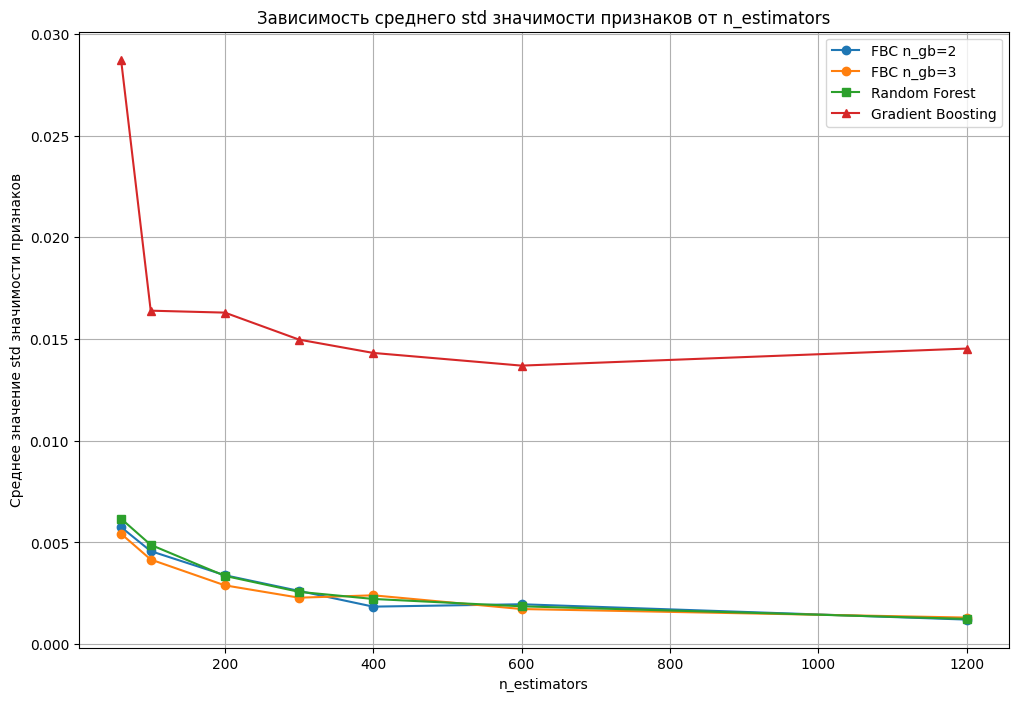

In [27]:
X = pd.read_csv(
    'https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar5/data/give_me_some_credit.csv', 
    index_col=0)
X = X.dropna().reset_index(drop=True)  
y = X['SeriousDlqin2yrs'].reset_index(drop=True)  
X = X.drop(['SeriousDlqin2yrs'], axis=1) 

X['RevolvingUtilizationOfUnsecuredLines_0'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_1'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_2'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_3'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_4'] = X['RevolvingUtilizationOfUnsecuredLines']
X = X.drop(['RevolvingUtilizationOfUnsecuredLines'], axis=1) 
 
n_gb_estimators_list = [2,3]
n_estimators_list = [60, 120, 200, 300, 400, 600, 1200]
n_models = 30
n_jobs = 15 
n_jobs_grid = 30 
depth = list(range(1,10))
amount_learning_rate = 10 
w_l_r = 0.2 
n_points = 5
df_fbc_original, df_gb_original, df_rf_original = plot_curve_time_grid_best_params_n_n_gb1(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs,  n_jobs_grid, 
                                                                                          depth, amount_learning_rate, 
                                                                                          w_l_r, n_points)


df_fbc_original.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_give_me_some_credit_original1.xlsx') 
df_gb_original.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_give_me_some_credit_original1.xlsx') 
df_rf_original.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_give_me_some_credit_original1.xlsx')

## give_me_some_credit balanced

### learning_rate = 1

FBC n_gb=2:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5/7 [08:02<04:22, 131.22s/it]/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Gradient Boosting: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [08:08<00:00, 69.76s/it]


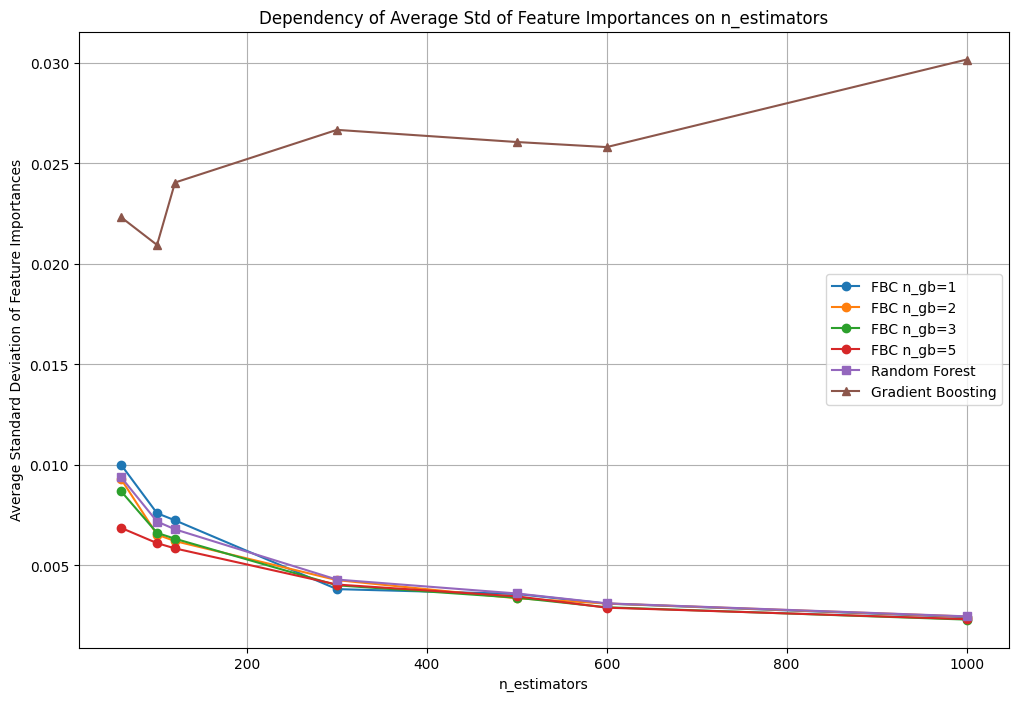

In [24]:
# balanced data
X = pd.read_csv( 'https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar5/data/give_me_some_credit.csv', 
    index_col=0)
X = X.groupby('SeriousDlqin2yrs').sample(n=X['SeriousDlqin2yrs'].value_counts().min(), random_state=42).dropna().reset_index(drop=True) 
y = X['SeriousDlqin2yrs'] 
X = X.drop(['SeriousDlqin2yrs'], axis=1)   

X['RevolvingUtilizationOfUnsecuredLines_0'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_1'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_2'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_3'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_4'] = X['RevolvingUtilizationOfUnsecuredLines']
X = X.drop(['RevolvingUtilizationOfUnsecuredLines'], axis=1)  

n_gb_estimators_list = [1,2,3,5]
n_estimators_list = [60, 100, 120, 300, 500, 600, 1000]
n_models = 30
n_jobs = 30 
n_jobs_grid = 30 
depth = list(range(1,10))
amount_learning_rate = 10
df_fbc_balanced, df_gb_balanced, df_rf_balanced = plot_curve_time_grid_best_params_n_n_gb(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, 
                                                                                          depth, amount_learning_rate)  

df_fbc_balanced.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_give_me_some_credit_balanced.xlsx') 
df_gb_balanced.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_give_me_some_credit_balanced.xlsx') 
df_rf_balanced.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_give_me_some_credit_balanced.xlsx')

In [ ]:
### Тестирование learning_rate = 1

### learning_rate подбирается GridSearchCV

FBC n_gb=2:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5/7 [11:48<06:34, 197.04s/it]/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Gradient Boosting: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [07:15<00:00, 62.17s/it]


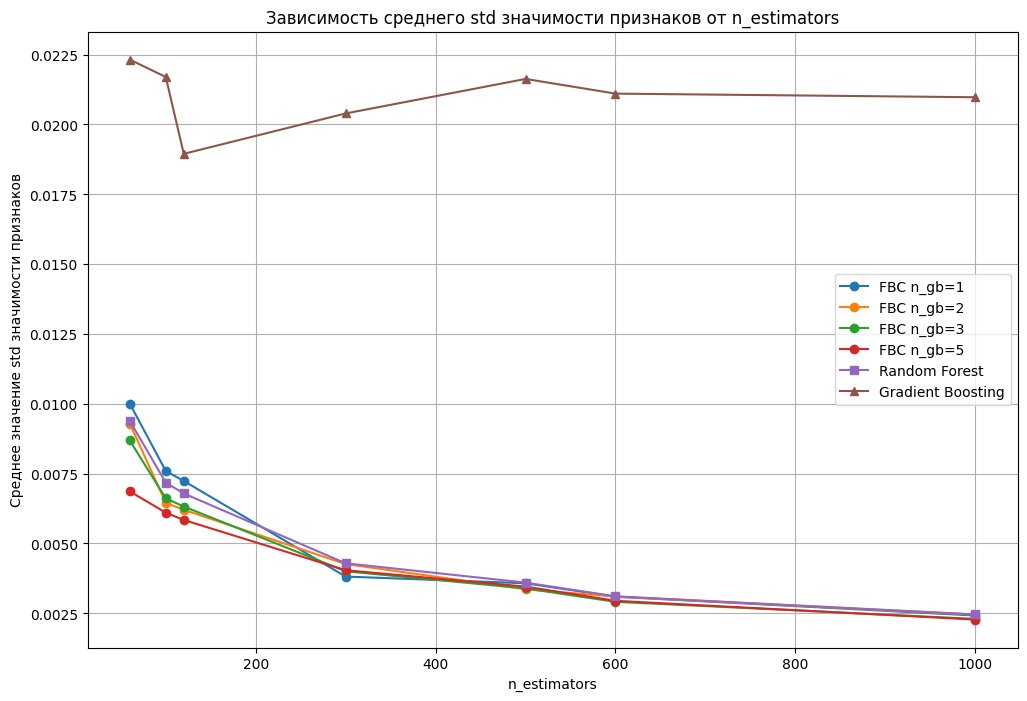

In [25]:
# balanced data
X = pd.read_csv( 'https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar5/data/give_me_some_credit.csv', 
    index_col=0)
X = X.groupby('SeriousDlqin2yrs').sample(n=X['SeriousDlqin2yrs'].value_counts().min(), random_state=42).dropna().reset_index(drop=True) 
y = X['SeriousDlqin2yrs'] 
X = X.drop(['SeriousDlqin2yrs'], axis=1)   

X['RevolvingUtilizationOfUnsecuredLines_0'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_1'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_2'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_3'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_4'] = X['RevolvingUtilizationOfUnsecuredLines']
X = X.drop(['RevolvingUtilizationOfUnsecuredLines'], axis=1)  

n_gb_estimators_list = [1,2,3,5]
n_estimators_list = [60, 100, 120, 300, 500, 600, 1000]
n_models = 30
n_jobs = 30
n_jobs_grid = 30 
depth = list(range(1,10))
amount_learning_rate = 10 
w_l_r = 0.2 
n_points = 5
df_fbc_balanced1, df_gb_balanced1, df_rf_balanced1 = plot_curve_time_grid_best_params_n_n_gb1(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, 
                                                                                          depth, amount_learning_rate, 
                                                                                          w_l_r, n_points)  

df_fbc_balanced1.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_give_me_some_credit_balanced1.xlsx') 
df_gb_balanced1.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_give_me_some_credit_balanced1.xlsx') 
df_rf_balanced1.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_give_me_some_credit_balanced1.xlsx')

## UCI_Credit_Card 

In [ ]:
df = pd.read_csv('UCI_Credit_Card.csv') 
#df_class_1 = df[df['default.payment.next.month'] == 1].sample(5051, random_state=42)
#df_class_0 = df[df['default.payment.next.month'] == 0].sample(5051, random_state=42)
#df_ = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True).dropna() 
df_ = shuffle(df, random_state=42).drop(["ID"], axis = 1) 
def f1(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2  
    if a == b and a == 0: return 0 
    else:  return (a - b)/max(abs(a), abs(b)) 

def f2(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2    
    return a - b   
    
df_['new_feature_1'] = df_.apply(lambda x: f1(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1) 
df_['new_feature_2'] = df_.apply(lambda x: f2(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1)   
df_['new_feature_1_2_equal_zero'] = df_.apply(lambda x: int( x['BILL_AMT1'] == (x['BILL_AMT2'] + x['BILL_AMT3'] )/2 and  x['BILL_AMT1'] == 0 ), axis = 1) 

df_ = df_.reset_index(drop=True) 
X = df_.drop(columns=['default.payment.next.month'])
y = df_['default.payment.next.month']
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1)  
X = X.drop(['PAY_0'], axis=1) 

n_gb_estimators_list = [2,3]
n_estimators_list =  [ 60, 120, 240, 360, 600, 960, 1200]
n_models = 30
n_jobs = 15
n_jobs_grid = 20 
depth = list(range(1,10))
amount_learning_rate = 10 
w_l_r = 0.2 
n_points = 5
df_fbc_UCI_Credit_Card, df_gb_UCI_Credit_Card, df_rf_UCI_Credit_Card = plot_curve_time_grid_best_params_n_n_gb1(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, 
                                                                                          depth, amount_learning_rate, 
                                                                                          w_l_r, n_points)  

df_fbc_UCI_Credit_Card.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_UCI_Credit_Card1.xlsx') 
df_gb_UCI_Credit_Card.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_UCI_Credit_Card1.xlsx') 
df_rf_UCI_Credit_Card.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_UCI_Credit_Card1.xlsx')

## breast_cancer

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names) 
y = data.target   
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с базовыми параметрами
X['worst_radius_1'] = X['worst radius']
X['worst_radius_2'] = X['worst radius'] 
X['worst_radius_3'] = X['worst radius'] 
X['worst_radius_4'] = X['worst radius'] 
X['worst_radius_5'] = X['worst radius']  
X = X.drop(['worst radius'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify= y)

n_gb_estimators_list = [1,2,3,5]
n_estimators_list = [60, 100, 120, 300, 500, 600, 1000]
n_models = 30
n_jobs = 10 
n_jobs_grid = 20 
depths = list(range(1,11))
amount_learning_rate = 20 
w_l_r = 0.2 
n_points = 5 
df_fbc_breast_cancer, df_gb_breast_cancer, df_rf_breast_cancer = plot_curve_time_grid_best_params_n_n_gb1(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, 
                                                                                          depths, amount_learning_rate, 
                                                                                          w_l_r, n_points)  

#df_fbc_breast_cancer.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_breast_cancer.xlsx') 
#df_gb_breast_cancer.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_breast_cancer.xlsx') 
#df_rf_breast_cancer.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_breast_cancer.xlsx')

In [ ]:
## tabular Playground

In [68]:
df_tabular = pd.read_csv('./tabular_data/train.csv')

In [69]:
df_tabular = pd.read_csv('./tabular_data/train.csv')
df_tabular = df_tabular.drop(['id'],axis = 1).sample(n=40000).fillna(0) 
X = df_tabular.drop(['claim'], axis = 1)  
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с n_estimators = 1000
X['f38_1'] = X['f38'] 
X['f38_2'] = X['f38'] 
X['f38_3'] = X['f38'] 
X['f38_4'] = X['f38'] 
X['f38_5'] = X['f38'] 
X = X.drop(['f38'], axis=1) 
y = df_tabular['claim'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
# устанавливаем max_depth=None в RandomForestRegressor и смотрим до какой глубины обучаются деревья 
rf_model_full_depth = RandomForestRegressor(n_estimators=4000, max_depth=None, random_state=42, n_jobs = 30)
rf_model_full_depth.fit(X_train, y_train)

RandomForestRegressor(n_estimators=4000, n_jobs=30, random_state=42)

80.5295


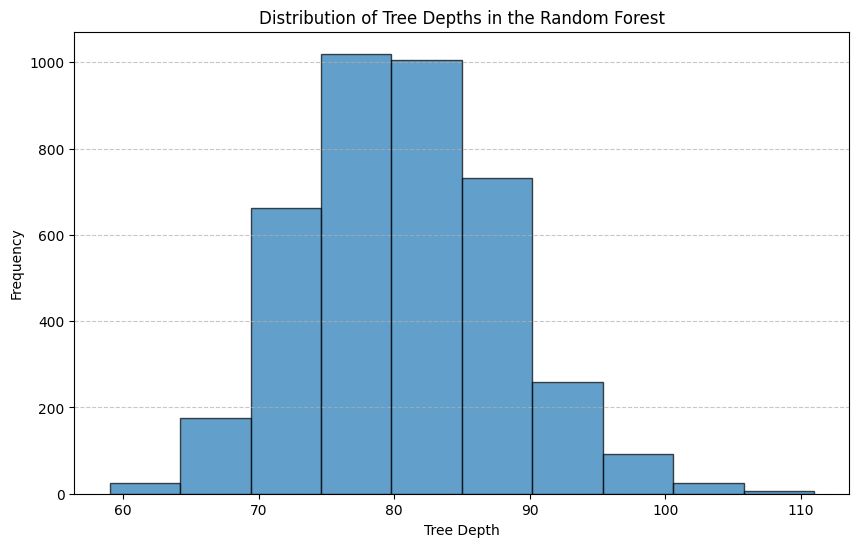

In [70]:
tree_depths = [estimator.tree_.max_depth for estimator in rf_model_full_depth.estimators_]

# Calculate the average tree depth
average_depth = sum(tree_depths) / len(tree_depths)
print(average_depth)

plt.figure(figsize=(10, 6))
plt.hist(tree_depths, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tree Depths in the Random Forest')
plt.xlabel('Tree Depth')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Полученные значения max_depth нужны для определения интервалов в GridSearchCV для поиска оптимальной max_depth


In [79]:
df_tabular = pd.read_csv('./tabular_data/train.csv')
df_tabular = df_tabular.drop(['id'],axis = 1).sample(n=40000).fillna(0) 
X = df_tabular.drop(['claim'], axis = 1)  
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с n_estimators = 1000
X['f38_1'] = X['f38'] 
X['f38_2'] = X['f38'] 
X['f38_3'] = X['f38'] 
X['f38_4'] = X['f38'] 
X['f38_5'] = X['f38'] 
X = X.drop(['f38'], axis=1).reset_index(drop=True)
y = df_tabular['claim'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=0)
param_grid = { 
        'n_estimators':[4000],
        'max_depth': range(10,100, 10),
        'max_features': ['sqrt'], 
        'n_jobs':[1], 
        'bootstrap':[False]
} 

grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='roc_auc',
                            n_jobs=30,
                            refit=False
                        )
grid_search.fit(X, y)
best_params = grid_search.best_params_

In [80]:
 grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 4000,
 'n_jobs': 1}

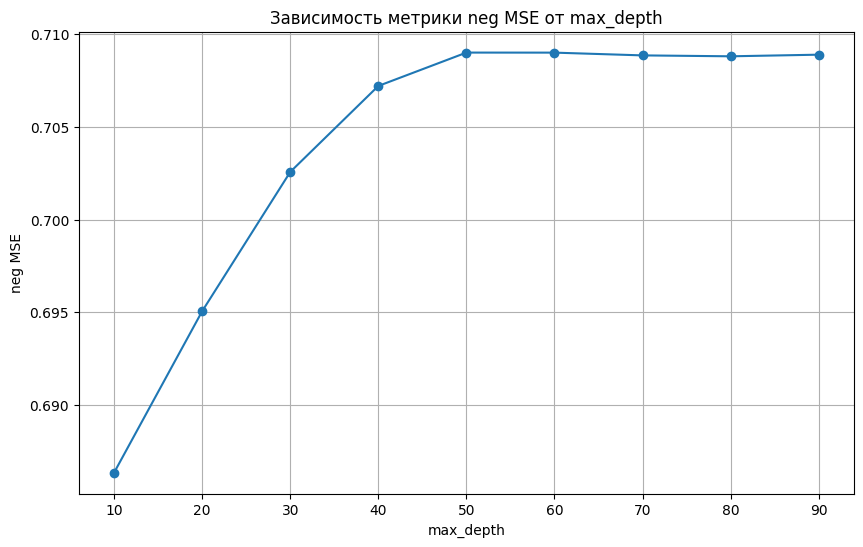

In [81]:
cv_results = pd.DataFrame(grid_search.cv_results_)
max_depths = cv_results['param_max_depth']
mean_test_scores = cv_results['mean_test_score']
best_scores = cv_results.groupby('param_max_depth')['mean_test_score'].max() 

plt.figure(figsize=(10, 6))
plt.plot(best_scores.index[:30], best_scores.values[:30], marker='o')
plt.xlabel('max_depth')
plt.ylabel('roc auc')
plt.title('Зависимость метрики roc auc от max_depth')
plt.grid(True)
plt.show()

выявляем значения, после которых качество модели выходит на плато и в этой окрестности углубляем поиск

In [ ]:
df_tabular = pd.read_csv('./tabular_data/train.csv')
df_tabular = df_tabular.drop(['id'],axis = 1).sample(n=40000).fillna(0) 
X = df_tabular.drop(['claim'], axis = 1)  
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с n_estimators = 1000
X['f38_1'] = X['f38'] 
X['f38_2'] = X['f38'] 
X['f38_3'] = X['f38'] 
X['f38_4'] = X['f38'] 
X['f38_5'] = X['f38'] 
X = X.drop(['f38'], axis=1).reset_index(drop=True)
y = df_tabular['claim'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=0)
param_grid = { 
        'n_estimators':[4000],
        'max_depth': range(5,60, 5),
        'max_features': ['sqrt'], 
        'n_jobs':[1], 
        'bootstrap':[False]
} 

grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='roc_auc',
                            n_jobs=30,
                            refit=False
                        )
grid_search.fit(X, y)
best_params = grid_search.best_params_

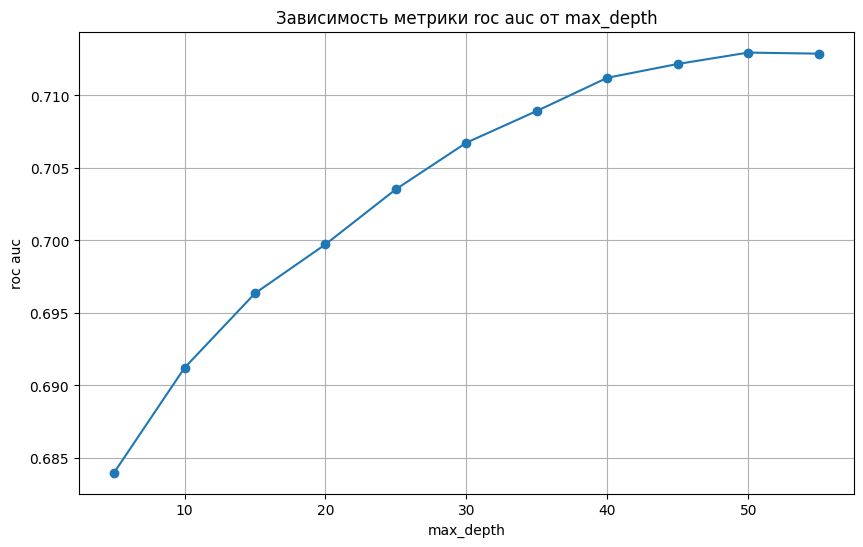

In [83]:
cv_results = pd.DataFrame(grid_search.cv_results_)
max_depths = cv_results['param_max_depth']
mean_test_scores = cv_results['mean_test_score']
best_scores = cv_results.groupby('param_max_depth')['mean_test_score'].max() 

plt.figure(figsize=(10, 6))
plt.plot(best_scores.index[:30], best_scores.values[:30], marker='o')
plt.xlabel('max_depth')
plt.ylabel('roc auc')
plt.title('Зависимость метрики roc auc от max_depth')
plt.grid(True)
plt.show()

повторяем

In [ ]:
df_tabular = pd.read_csv('./tabular_data/train.csv')
df_tabular = df_tabular.drop(['id'],axis = 1).sample(n=40000).fillna(0) 
X = df_tabular.drop(['claim'], axis = 1)  
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с n_estimators = 1000
X['f38_1'] = X['f38'] 
X['f38_2'] = X['f38'] 
X['f38_3'] = X['f38'] 
X['f38_4'] = X['f38'] 
X['f38_5'] = X['f38'] 
X = X.drop(['f38'], axis=1).reset_index(drop=True)
y = df_tabular['claim'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=0)
param_grid = { 
        'n_estimators':[4000],
        'max_depth': range(40,54, 2),
        'max_features': ['sqrt'], 
        'n_jobs':[1], 
        'bootstrap':[False]
} 

grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='roc_auc',
                            n_jobs=30,
                            refit=False
                        )
grid_search.fit(X, y)
best_params = grid_search.best_params_

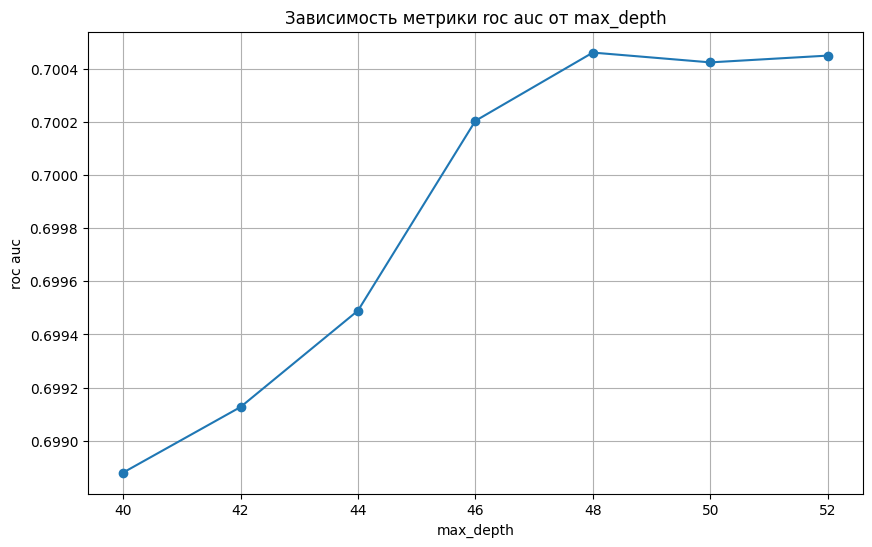

In [85]:
cv_results = pd.DataFrame(grid_search.cv_results_)
max_depths = cv_results['param_max_depth']
mean_test_scores = cv_results['mean_test_score']
best_scores = cv_results.groupby('param_max_depth')['mean_test_score'].max() 

plt.figure(figsize=(10, 6))
plt.plot(best_scores.index[:30], best_scores.values[:30], marker='o')
plt.xlabel('max_depth')
plt.ylabel('roc auc')
plt.title('Зависимость метрики roc auc от max_depth')
plt.grid(True)
plt.show()

FBC n_gb=2:   0%|                                         | 0/2 [00:00<?, ?it/s]/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Gradient Boosting: 100%|█████████████████████████| 2/2 [12:54<00:00, 387.00s/it]


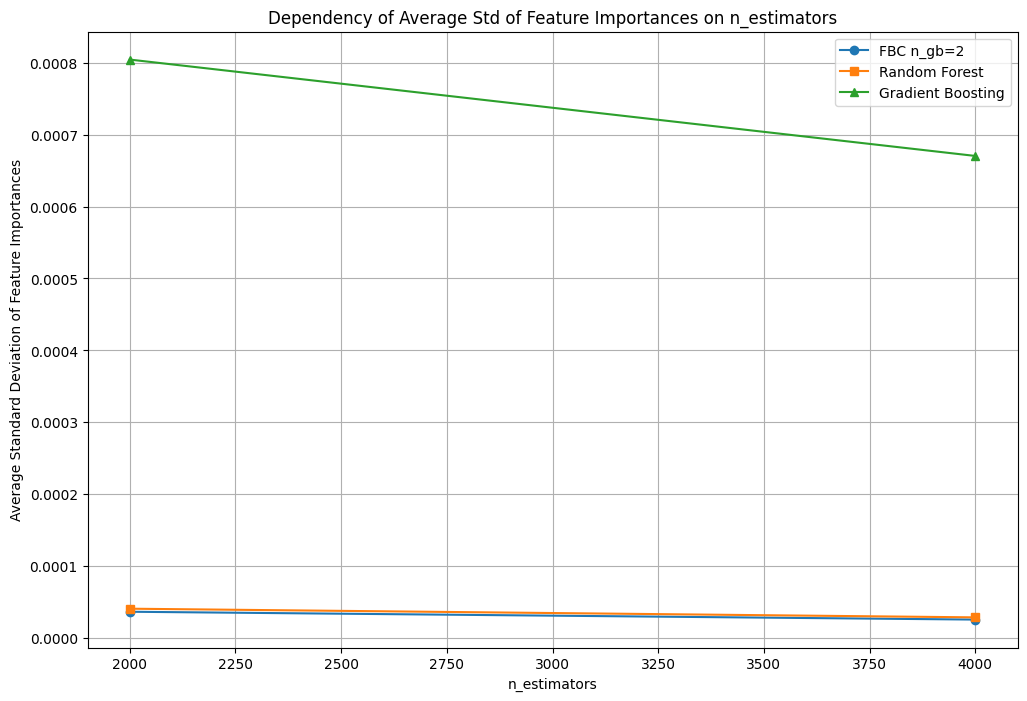

In [97]:
df_tabular = pd.read_csv('./tabular_data/train.csv')
df_tabular = df_tabular.drop(['id'],axis = 1).sample(n=40000).fillna(0) 
X = df_tabular.drop(['claim'], axis = 1)  
# признак для дублирования мы выбрали 3 по значимости в feature importance в RF с n_estimators = 1000
X['f38_1'] = X['f38'] 
X['f38_2'] = X['f38'] 
X['f38_3'] = X['f38'] 
X['f38_4'] = X['f38'] 
X['f38_5'] = X['f38'] 
X = X.drop(['f38'], axis=1) 
y = df_tabular['claim'] 


n_gb_estimators_list = [2]
n_estimators_list =  [2000, 4000]
n_models = 30
n_jobs = 30 
n_jobs_grid = 30
depths = range(46,52)
depths_gb = range(1,2)
df_fbc_tabular, df_gb_tabular, df_rf_tabular = plot_curve_time_grid_best_params_n_n_gb_l_r_eq_1(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, 
                                                                                          depths = depths, depths_gb=depths_gb)

df_fbc_tabular.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_tabular_2_4652.xlsx') 
df_gb_tabular.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_tabular_2_4652.xlsx') 
df_rf_tabular.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_tabular_2_4652.xlsx')

In [98]:
df_fbc_tabular

,n_estimators,n_gb_estimators,learning_rate,max_depth,max_features,avg_training_time,mean_std_importance,mean_roc_auc
0,2000,2,1,50,sqrt,6566.517654,0.000036,0.703257
1,4000,2,1,48,sqrt,15642.847645,0.000025,0.704150


In [99]:
df_rf_tabular

,n_estimators,max_depth,max_features,avg_training_time,mean_std_importance,mean_roc_auc
0,2000,48,sqrt,3540.105193,0.000040,0.703533
1,4000,48,sqrt,5668.561486,0.000028,0.704131


# Multimodal_Single-Cell_Integration

In [11]:
pd.set_option('display.max_columns', 10)   
pd.set_option('display.max_rows', 10) 

In [12]:
%%time
df_rna = pd.read_hdf('train_cite_inputs.h5')
df_y = pd.read_hdf('train_cite_targets.h5')

CPU times: user 16.4 s, sys: 3.53 s, total: 20 s
Wall time: 20 s


In [12]:
X = df_rna[:10000]
y = df_y['CD36'][:10000]

In [ ]:
from catboost import CatBoostRegressor

### тестирование репрезентативности выборки

In [60]:
# Для определения репрезентативности выборки обучаем модель CatBoostRegressor на обычных данных и данных с рандомизированным target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#original
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
y_pred = model.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred)

#permuted
model_permuted = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)
y_train_permuted = np.random.permutation(y_train)
model_permuted.fit(X_train, y_train_permuted, eval_set=(X_test, y_test), early_stopping_rounds=50)
y_pred_permuted = model_permuted.predict(X_test)
mse_permuted = mean_squared_error(y_test, y_pred_permuted)

print(f'MSE original: {mse_original:.4f}')
print(f'MSE permuted: {mse_permuted:.4f}')

MSE original: 14.4959
MSE permuted: 62.8130


Как видно MSE original существенно больше MSE permuted, значит данные информативны

### определение оптимального значения max_depth

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model_full_depth = RandomForestRegressor(n_estimators=4000, max_depth=None, random_state=42, n_jobs = 30)
rf_model_full_depth.fit(X_train, y_train)

In [ ]:
tree_depths = [estimator.tree_.max_depth for estimator in rf_model_full_depth.estimators_]

# Calculate the average tree depth
average_depth = sum(tree_depths) / len(tree_depths)
print(average_depth)

plt.figure(figsize=(10, 6))
plt.hist(tree_depths, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tree Depths in the Random Forest')
plt.xlabel('Tree Depth')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
model = RandomForestRegressor(random_state=0)
df_rna = pd.read_hdf('train_cite_inputs.h5')
df_y = pd.read_hdf('train_cite_targets.h5')
X = df_rna
X['target'] = df_y['CD36']
X = X.reset_index(drop=True)[:1000].fillna(0)
y = X['target'] 
X = X.drop(['target'], axis = 1)  

param_grid = { 
        'n_estimators':[1500],
        'max_depth': range(1,20,3),
        'max_features': ['sqrt'], 
        'n_jobs':[30], 
        'bootstrap':[False]
} 

grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='neg_mean_squared_error',
                            n_jobs=1,
                            refit=False
                        )
grid_search.fit(X, y)
best_params = grid_search.best_params_

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
max_depths = cv_results['param_max_depth']
mean_test_scores = cv_results['mean_test_score']
best_scores = cv_results.groupby('param_max_depth')['mean_test_score'].max() 

plt.figure(figsize=(10, 6))
plt.plot(best_scores.index[:30], best_scores.values[:30], marker='o')
plt.xlabel('max_depth')
plt.ylabel('neg MSE')
plt.title('Зависимость метрики neg MSE от max_depth')
plt.grid(True)
plt.show()

### определение оптимального значения n_estimators

In [14]:
X = df_rna
X['target'] = df_y['CD36']
X = X.reset_index(drop=True)[:1000].fillna(0)
y = X['target'] 
X = X.drop(['target'], axis = 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor(random_state=0)
df_rna = pd.read_hdf('train_cite_inputs.h5')
df_y = pd.read_hdf('train_cite_targets.h5')
X = df_rna
X['target'] = df_y['CD36']
X = X.reset_index(drop=True)[:1000].fillna(0)
y = X['target'] 
X = X.drop(['target'], axis = 1)  

param_grid = { 
        'n_estimators':[500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000],
        'max_depth': [11],
        'max_features': ['sqrt'], 
        'n_jobs':[30], 
        'bootstrap':[False]
} 

grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=[(X_train.index, X_test.index)],
                            scoring='neg_mean_squared_error',
                            n_jobs=1,
                            refit=False
                        )
grid_search.fit(X, y)
best_params = grid_search.best_params_

In [22]:
best_params 

{'bootstrap': False,
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 3000,
 'n_jobs': 30}

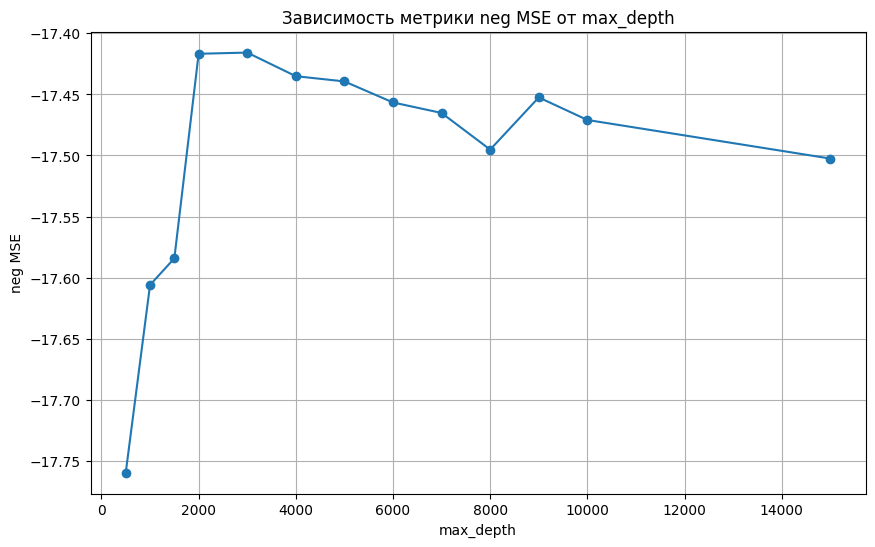

In [23]:
cv_results = pd.DataFrame(grid_search.cv_results_)
max_depths = cv_results['param_n_estimators']
mean_test_scores = cv_results['mean_test_score']
best_scores = cv_results.groupby('param_n_estimators')['mean_test_score'].max() 

plt.figure(figsize=(10, 6))
plt.plot(best_scores.index[:30], best_scores.values[:30], marker='o')
plt.xlabel('max_depth')
plt.ylabel('neg MSE')
plt.title('Зависимость метрики neg MSE от max_depth')
plt.grid(True)
plt.show()

### Тестирование ForestBoostingClassifier с learning_rate = 1

In [4]:
%%time 
len_dataset = 50000
df_rna = pd.read_hdf('train_cite_inputs.h5').head(len_dataset)
df_y = pd.read_hdf('train_cite_targets.h5').head(len_dataset)

CPU times: user 16.5 s, sys: 3.8 s, total: 20.3 s
Wall time: 20.5 s


In [7]:
%%time
X = df_rna 
X['target'] = df_y['CD36'] 
X = X.reset_index(drop=True)[:10000]  
X = X.fillna(0) 
y = X['target']  
X = X.drop(['target'], axis = 1) 

CPU times: user 2.12 s, sys: 3.72 s, total: 5.84 s
Wall time: 5.84 s


In [ ]:
n_gb_estimators_list = [2]
n_estimators_list = [1000, 2000]
n_models = 150
n_jobs = 30 
n_jobs_grid = 30
depths = list(range(4, 14))

df_fbc_Multimodal, df_gb_Multimodal, df_rf_Multimodal = plot_curve_time_grid_best_params_n_n_gb_l_r_eq_1_Regressor(X, y, n_gb_estimators_list, 
                                                                                          n_estimators_list, n_models, 
                                                                                          n_jobs, n_jobs_grid, depths) 
df_fbc_Multimodal.to_excel('./plot_curve_time_grid_best_params_n_n_gb/fbc_Multimodal_150.xlsx') 
df_gb_Multimodal.to_excel('./plot_curve_time_grid_best_params_n_n_gb/gb_Multimodal_150.xlsx') 
df_rf_Multimodal.to_excel('./plot_curve_time_grid_best_params_n_n_gb/rf_Multimodal_150.xlsx')

FBR n_gb=2:   0%|                                         | 0/2 [00:00<?, ?it/s]

In [34]:
df_fbc_Multimodal

,n_estimators,n_gb_estimators,learning_rate,max_depth,max_features,avg_training_time,mean_std_importance,mean_mse
0,1000,2,1,6,sqrt,550.265033,0.000014,20.252986
1,2000,2,1,7,sqrt,1238.734348,0.000009,20.081043


In [35]:
df_rf_Multimodal 

,n_estimators,max_depth,max_features,avg_training_time,mean_std_importance,mean_mse
0,1000,11,sqrt,397.840737,0.000012,21.506000
1,2000,11,sqrt,795.647095,0.000009,21.472428


# Выборка Default of Credit Card Clients Dataset
Ссылка: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

Содержит информацию о платежах клиентов кредитных карт в Тайване с периода Апрель 2005 г. по Сентябрь 2005 г.
Целевая переменная default.payment.next.month - будет ли неплатеж (1 - да, 0 - нет). Классы не сбалансированы - 1:4.
На этой выборке удобно смотреть, какие признаки влияют на целевое предсказание.

Выборка содержит 25 признаков, 1 из которых целевой: \
$ID :$ ID каждого клиента\
$LIMIT\_BAL :$ размер выданного кредита (NT dollar)\
$SEX :$ пол (1=male, 2=female)\
$EDUCATION :$ образование - 6 уникальных значений\
$MARRIAGE :$ брак - 3 уникальных признака\
$AGE :$ возраст\
$PAY_i :$ статус погашения в месяц i - 10 уникальных значений, i лежит в диапазоне [Апрель, Сентябрь]\
$BILL\_AMT_i :$ сумма выписки по счету за месяц i (NT dollar)\
$PAY\_AMT_i :$ сумма предыдущего платежа (NT dollar)\
${default.payment.next\_month} :$ неплатеж - целевая переменная.\


## Подготовка Данных

In [69]:
df = pd.read_csv('UCI_Credit_Card.csv') 

#### Устранения дисбаланса классов

In [70]:
df_class_1 = df[df['default.payment.next.month'] == 1].sample(5051, random_state=42)
df_class_0 = df[df['default.payment.next.month'] == 0].sample(5051, random_state=42)
df_ = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True).dropna() 
df_ = shuffle(df_, random_state=42).drop(["ID"], axis = 1)

In [71]:
X = df_.drop(['default.payment.next.month'], axis = 1)
y = df_['default.payment.next.month']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

Теперь в качестве метрики качества будет выступать accuracy_score

In [72]:
X_train.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7774,240000.0,1,1,1,60,2,0,0,0,0,...,191992.0,185383.0,179565.0,92788.0,7001.0,6180.0,6000.0,5951.0,5285.0,192557.0
3113,190000.0,1,1,2,34,2,2,2,2,0,...,170001.0,165797.0,167654.0,178044.0,14500.0,8000.0,0.0,6100.0,13100.0,0.0
5977,10000.0,1,2,2,26,0,0,0,0,0,...,15318.0,8610.0,8790.0,8963.0,2234.0,1135.0,1086.0,319.0,319.0,180.0
795,340000.0,2,1,2,29,0,0,0,0,0,...,138933.0,139824.0,142461.0,145269.0,6400.0,7000.0,5000.0,5200.0,5500.0,25000.0
1024,80000.0,2,1,2,27,0,0,0,0,0,...,37330.0,38407.0,39168.0,40037.0,1800.0,2000.0,2000.0,1700.0,1650.0,3200.0


### Описание параметров модели ForestBoostingClassifier

$n\_estimators :$ Количество моделей в ансамбле.

$n\_gb\_estimators :$ Количество деревьев в каждой модели градиентного бустинга.

$loss :$ Функция потерь, используемая для оптимизации. Например, 'log\_loss' для логистической регрессии.

$learning\_rate :$ Темп обучения, влияющий на уменьшение весов каждого дерева градиентного бустинга.

$subsample :$ Доля выборки, которая используется для обучения каждого дерева градиентного бустинга. Например, при значении $0.8$ каждое дерево обучается на 80\% выборки.

$criterion :$ Критерий для оценки расщеплений узлов деревьев градиентного бустинга. Например, 'friedman\_mse' для среднеквадратичной ошибки.

$min\_samples\_split :$ Минимальное количество образцов, необходимых для расщепления узла.

$min\_samples\_leaf :$ Минимальное количество образцов в листе (конечном узле дерева) градиентного бустинга.

$min\_weight\_fraction\_leaf :$ Минимальная доля суммарного веса образцов для каждого листа градиентного бустинга .

$max\_depth :$ Максимальная глубина дерева модели градиентного бустинга, ограничивающая количество уровней в каждом дереве.

$min\_impurity\_decrease :$ Минимальное уменьшение показателя нечистоты (например, Gini или энтропии), требуемое для расщепления узла.

$init :$ Модель, которая используется для начальной инициализации предсказаний.

$random\_state :$ Инициализатор генератора случайных чисел для воспроизводимости результатов.

$max\_features :$ количество признаков, используемых при создании решающего правила на узле дерева градиентного бустинга.

$verbose :$ Уровень подробности вывода во время обучения модели градиентного бустинга.

$max\_leaf\_nodes :$ Максимальное количество конечных узлов (листьев) в каждом дереве градиентного бустинга.

$warm\_start :$ Если $True$, повторно использует предыдущие результаты обучения, добавляя новые модели к существующим в ансамбле.

$validation\_fraction :$ Доля данных, выделяемых для валидации, если включена ранняя остановка.

$n\_iter\_no\_change :$ Количество итераций без улучшений до остановки обучения при ранней остановке.

$tol :$ Пороговое значение для ранней остановки градиентного бустинга, измеряющее минимальное изменение функции потерь.

$ccp\_alpha :$ Параметр для минимизации сложности модели путем обрезки деревьев градиентного бустинга (cost-complexity pruning).

$bootstrap :$ Если $True$, для каждого дерева градиентного бустинга выбирается случайная подвыборка с возвращением.

$oob\_score :$ Если $True$, оценивает модель градиентного бустинга с помощью образцов, не попавших в подвыборку (out-of-bag).

$n\_jobs :$ Количество ядер, используемых для параллельного обучения деревьев.

$max\_samples :$ Если bootstrap включен, максимальное количество образцов для обучения каждого дерева.


## Вырождение модели в случае одного дерева и сравнение с DecisionTreeClassifier

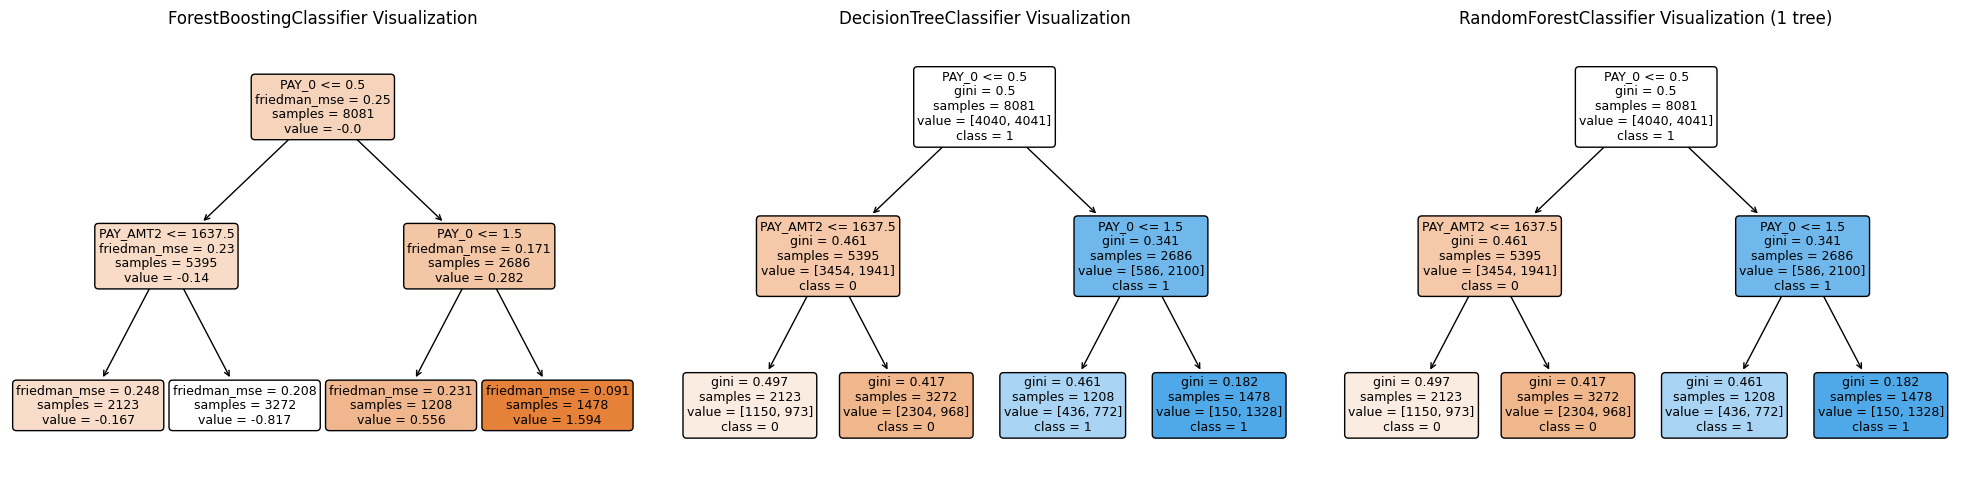

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

rbc = ForestBoostingClassifier(n_estimators=1, n_gb_estimators=1, max_depth=2, max_features=1., bootstrap=False)  
rbc.fit(X_train, y_train)
plot_tree(rbc.estimators_[0].estimators_[0, 0], filled=True, feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True, fontsize=9, proportion=False, ax=axes[0])  
axes[0].set_title("ForestBoostingClassifier Visualization")

clf = DecisionTreeClassifier(max_depth=2, max_features=1.) 
clf.fit(X_train, y_train)
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True, fontsize=9, proportion=False, ax=axes[1])  
axes[1].set_title("DecisionTreeClassifier Visualization") 

rf = RandomForestClassifier(n_estimators = 1, max_depth=2, max_features = 1., bootstrap=False,  random_state=69)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True, fontsize=9, proportion=False, ax=axes[2])
axes[2].set_title("RandomForestClassifier Visualization (1 tree)") 

plt.tight_layout()
plt.show()

## Сравнение с RandomForestClassifier

In [74]:
rf_model = RandomForestClassifier(n_estimators = 30, max_depth = 3, max_features = 1., bootstrap=False,  random_state=89)
rf_model.fit(X_train, y_train)
print('rf_accuracy: ', accuracy_score(y_test, rf_model.predict(X_test)) ) 

rb =  ForestBoostingClassifier( n_estimators = 30 , n_gb_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=89) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

rf_accuracy:  0.677882236516576
accuracy rb:  0.677882236516576


Вообще говоря, ForestBoostingClassifier не обязан совпадать с RandomForestClassifier даже при n_gb_estimators = 1, - они идентичны только при  
max_features =  1. и  learning_rate=1.

## Демонстрация random_state у разных estimators

In [75]:
rb.estimators_[:5]

[BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=2146170771),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1665720606),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1099241604),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=765119341),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1108533782)]

## Сравнение с GradientBoostingClassifier

In [77]:
gb_model = GradientBoostingClassifier(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=0)
gb_model.fit(X_train, y_train)
print('gb_accuracy: ', accuracy_score(y_test, gb_model.predict(X_test)) ) 

rb =  ForestBoostingClassifier( n_estimators = 1 , n_gb_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=0) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

gb_accuracy:  0.6699653636813458
accuracy rb:  0.6699653636813458


## feature importance

### новые предикторы:
Пример: Задача кредитного скоринга (UCI_Credit_Card) \
Данные: сумма предоставленного кредита, пол, уровень образования, семейное положение, возраст, статус погашения в разные месяцы,  сумма на счету в разные месяцы, суммы предварительных платежей помесячно, факт просрочки платежа \
Преобразование предикторов в поисках лучшего:   

$$
\Huge a = \text{BILL\_AMT1},
$$

$$
\Huge b = \frac{\text{BILL\_AMT2} + \text{BILL\_AMT3}}{2},
$$

$$
\Huge f_1 = a,
$$

$$
\Huge f_2 = a - b,
$$

$$
\Huge f_3 = 
\begin{cases} 
\frac{a - b}{\max(a, b)}, & a \neq b, \\
0, & a = b.
\end{cases}
$$

BILL\_AMT1, BILL\_AMT2, BILL\_AMT3 - суммы на счету в месяцы от данного  

In [78]:
def f1(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2  
    if a == b and a == 0: 
        return 0 
    else:
        return (a - b)/max(abs(a), abs(b)) 

def f2(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2 
    return a - b  
df_['new_feature_1'] = df_.apply(lambda x: f1(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1) 
df_['new_feature_2'] = df_.apply(lambda x: f2(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1)   
df_['new_feature_1_2_equal_zero'] = df_.apply(lambda x: int( x['BILL_AMT1'] == (x['BILL_AMT2'] + x['BILL_AMT3'] )/2 and  x['BILL_AMT1'] == 0 ), axis = 1) 

### Importance новых предикторов, полученный DecisionTreeClassifier глубины 1 и 3:

In [79]:
df_[['new_feature_1', 'new_feature_2', 'new_feature_1_2_equal_zero']]

,new_feature_1,new_feature_2,new_feature_1_2_equal_zero
5403,0.106261,20958.0,0
8730,-0.245352,-17175.5,0
850,-0.160095,-1417.0,0
1606,0.051393,385.5,0
4914,1.000000,42063.0,0
...,...,...,...
5734,1.000000,11958.0,0
5191,0.117363,4575.5,0
5390,-0.006661,-679.5,0
860,-0.041142,-666.0,0


Accuracy of DecisionTree with max_depth=1: 0.5510
Accuracy of DecisionTree with max_depth=3: 0.5886


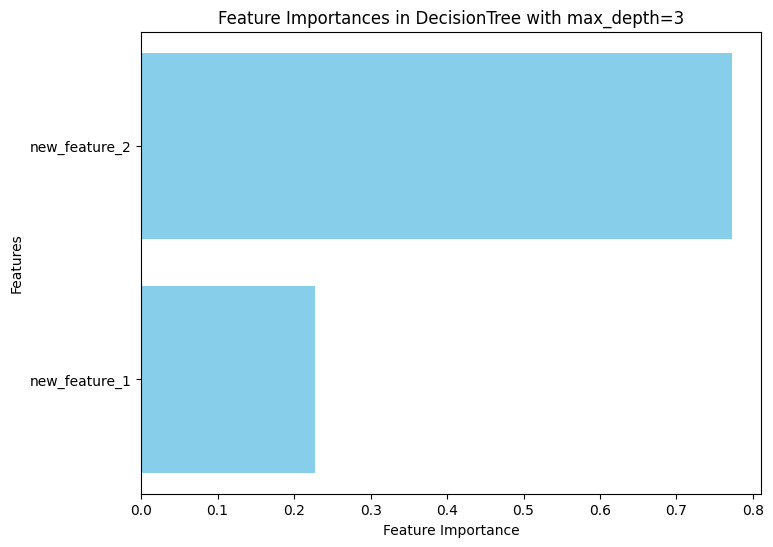

In [81]:
X = df_[['new_feature_1', 'new_feature_2']]
y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_1.fit(X_train, y_train)
y_pred_1 = tree_depth_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of DecisionTree with max_depth=1: {accuracy_1:.4f}") 

tree_depth_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_2.fit(X_train, y_train)
y_pred_2 = tree_depth_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy of DecisionTree with max_depth=3: {accuracy_2:.4f}")
importances = tree_depth_2.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(['new_feature_1', 'new_feature_2'], importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in DecisionTree with max_depth=3')
plt.show()

### Выбор порогов с помощью DecisionTree 

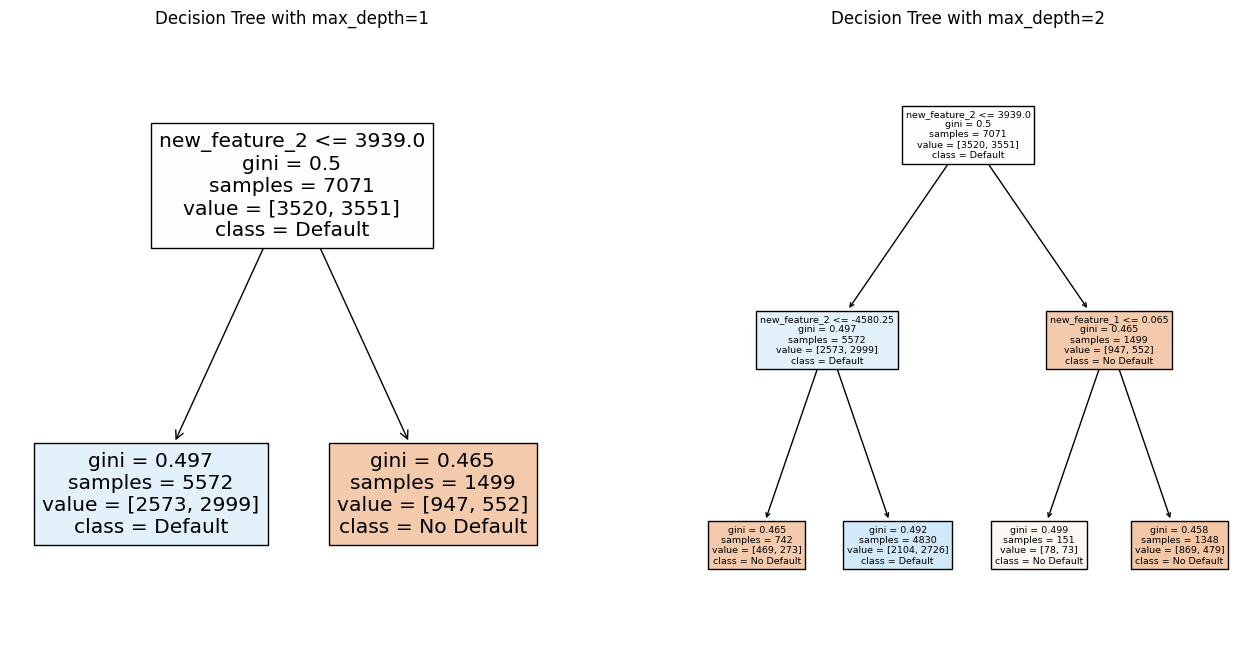

In [82]:
X = df_[['new_feature_1', 'new_feature_2', 'new_feature_1_2_equal_zero']]
y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_1.fit(X_train, y_train)
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_tree(tree_depth_1, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=1")
plt.subplot(1, 2, 2)
plot_tree(tree_depth_2, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=2")
plt.show()

### интерпритация Causal Inference
Бизнес рекомендация:
“Хочешь снизить на 5% расходы - возьми наш аккредитив” 

На языке $Causal Inference$: \
“оценить эффект аккредитива при снижении расходов на 5%” 

\begin{array}{|c|c|c|c|c|c|}
\hline
i & T & Y & Y(1) & Y(0) & Y(1) - Y(0) \\
\hline
1 & 0 & 1 & ? & 0 & ? \\
2 & 1 & 1 & 1 & ? & ? \\
3 & 1 & 0 & ? & ? & ? \\
4 & 0 & 0 & ? & 0 & ? \\
5 & 0 & 1 & ? & 1 & ? \\
6 & 1 & 1 & 1 & ? & ? \\
\hline
\end{array}

$T$: наблюдаемое лечение \
$Y$: наблюдаемый исход \
$i$: индекс индивида \
$Y_i(1)$: возможный исход при лечении \
$Y_i(0)$: возможный исход без лечения



### Сравнение Feature Importance RandomForestClassifier и GradientBoostingClassifier  
для тестирования Importance моделей мы добавляем искуственно-сгенерированные признаки на основе $PAY_0 $ \
-при правильной оценке модели должны иметь близкий Importance и стоять рядом

In [83]:
X = df_.drop(columns=['default.payment.next.month'])
y = df_['default.payment.next.month']
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  


In [84]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,new_feature_1,new_feature_2,new_feature_1_2_equal_zero,pay_0_1,pay_0_2,pay_0_3,pay_0_4,pay_0_5
7364,500000.0,2,1,2,51,-1,-1,-1,-1,-1,...,21001.0,88.0,-0.586283,-265.0,0,-3.0,49.666667,-110.0,-60.333333,3640.111111
1211,240000.0,1,1,1,39,1,-2,-2,-2,-2,...,0.0,0.0,0.000000,0.0,0,3.0,50.333333,-90.0,-39.666667,1573.444444
7872,80000.0,2,3,2,27,-2,-2,-2,-2,-2,...,2902.0,836.0,0.500000,836.0,0,-6.0,49.333333,-120.0,-70.666667,4993.777778
7121,20000.0,2,2,1,32,3,2,2,7,7,...,0.0,0.0,0.000000,0.0,0,9.0,51.000000,-70.0,-19.000000,361.000000
5753,50000.0,2,3,1,39,0,0,0,0,0,...,1000.0,1000.0,0.105230,4052.0,0,0.0,50.000000,-100.0,-50.000000,2500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,180000.0,1,2,2,28,0,0,0,0,0,...,3684.0,4000.0,0.067201,9347.5,0,0.0,50.000000,-100.0,-50.000000,2500.000000
6956,280000.0,2,1,2,31,-1,-1,-1,-1,-1,...,316.0,3179.0,0.799041,11743.5,0,-3.0,49.666667,-110.0,-60.333333,3640.111111
5868,30000.0,1,2,2,29,0,0,0,2,2,...,0.0,1000.0,-0.103876,-2244.5,0,0.0,50.000000,-100.0,-50.000000,2500.000000
4466,270000.0,2,2,2,29,0,0,0,0,0,...,14000.0,2500.0,0.227270,14208.0,0,0.0,50.000000,-100.0,-50.000000,2500.000000


In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators = 6000, max_depth = 7, n_jobs = 30)
rf_model.fit(X_train, y_train)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators = 6000,max_depth = 7)
gb_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({ 'Feature': feature_names, 'RandomForest Importance': rf_importances, 'GradientBoosting Importance': gb_importances})

importance_df_rf_sorted = importance_df.sort_values(by='RandomForest Importance', ascending=True)
importance_df_gb_sorted = importance_df.sort_values(by='GradientBoosting Importance', ascending=True)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.bar(importance_df_rf_sorted['Feature'], importance_df_rf_sorted['RandomForest Importance'], color='skyblue')
plt.ylabel('Importance')
plt.title('RandomForest Feature Importance')
plt.xticks(rotation=90)  

plt.subplot(1, 2, 2)
plt.bar(importance_df_gb_sorted['Feature'], importance_df_gb_sorted['GradientBoosting Importance'], color='lightcoral')
plt.ylabel('Importance')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

## Feature Importance модели RandomForestClassifier 
Importance в каждой модели реализуется через расчет Gain для бустинга (средний прирост точности, который достигается при использовании признака). Для каждой модели рассчитываются значимости признаков по модели. Значимость признака по ансамблю рассчитывается как средняя значимость признака по всем моделям.   
Интервалы доверия для признаков считаются через стандартное отклонение importance по их выборкам, полученным из ансамбля


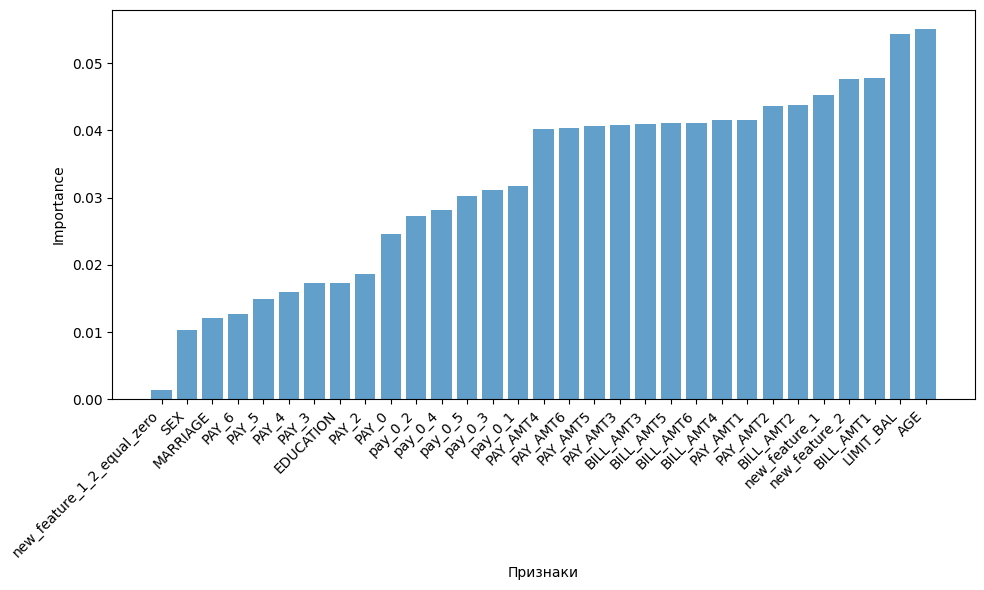

In [87]:
X = df_.drop(columns=['default.payment.next.month'])
y = df_['default.payment.next.month']
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

rb = RandomForestClassifier( n_estimators  = 600 , max_features =  'sqrt', 
                              n_jobs = 30, random_state = 42)    

rb.fit(X_train, y_train) 

importance = pd.DataFrame({ 'Feature': rb.feature_names_in_, 'Importance': rb.feature_importances_})

importance = importance.sort_values(by='Importance', ascending=True)


sorted_features = importance['Feature']
sorted_importances = importance ['Importance']


plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Importance')

plt.tight_layout()
plt.show() 


### Скорость сходимости модели ForestBoostingClassifier  
При фиксированном значении n_gb_estimators для каждого значения n_estimators рассчитывается среднее значении дисперсии по признакам по выборкам их importance по ансамблю

In [ ]:
n_estimators_range = list(range(2, 101))
gb_n_values = [1, 2, 5]
avg_variances_rf = []
avg_variances_rb_dict = {gb_n: [] for gb_n in gb_n_values}
rf_pbar = tqdm(n_estimators_range, desc='RandomForestClassifier', position=0, leave=True, unit='trees')
rb_pbars = {
    gb_n: tqdm(n_estimators_range, desc=f'ForestBoosting gb_n={gb_n}', position=i+1, leave=True, unit='trees')
    for i, gb_n in enumerate(gb_n_values)
}
for n_estimators in rf_pbar:
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=5, 
        random_state=69, 
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    feature_importances = np.array([tree.feature_importances_ for tree in rf.estimators_])
    variances = np.var(feature_importances, axis=0)
    avg_variances_rf.append(np.mean(variances))
    rf_pbar.set_postfix({'n_estimators': n_estimators})

for gb_n in gb_n_values:
    rb_pbar = rb_pbars[gb_n]
    for n_estimators in rb_pbar:
        rb = ForestBoostingClassifier(
            n_estimators=n_estimators,
            n_gb_estimators=gb_n,
            learning_rate=0.1,
            max_depth=3,
            max_features='sqrt',
            n_jobs=-1,
            random_state=42
        )
        rb.fit(X_train, y_train)
        feature_importances = np.array([est.feature_importances_ for est in rb.estimators_])
        variances = np.var(feature_importances, axis=0)
        avg_variances_rb_dict[gb_n].append(np.mean(variances))
        rb_pbar.set_postfix({'n_estimators': n_estimators})
rf_pbar.close()
for rb_pbar in rb_pbars.values():
    rb_pbar.close()
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_range, avg_variances_rf, marker='o', label='RandomForestClassifier')
markers = ['x', 's', 'D', '^']  
for idx, gb_n in enumerate(gb_n_values):
    plt.plot(
        n_estimators_range, 
        avg_variances_rb_dict[gb_n], 
        marker=markers[idx], 
        label=f'ForestBoostingClassifier gb_n={gb_n}'
    )
plt.title('Средняя дисперсия важности признаков vs Количество деревьев')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Средняя дисперсия важности признаков по ансамблю')
plt.legend(loc='upper right')  
plt.grid(True)
plt.tight_layout()
plt.show()


## Устойчивость ForestBoostingClassifier   
При фиксированном значении gb_n_estimators для каждого значения n_estimators генерируется и обучается 20 моделей с разными random_seed 
Строится зависимость средней дисперсии важности признаков по выборкам их importance из моделей с разными значениями random_seed

RandomBoosting gb_n=1:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=2:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=5:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=10:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomForest:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

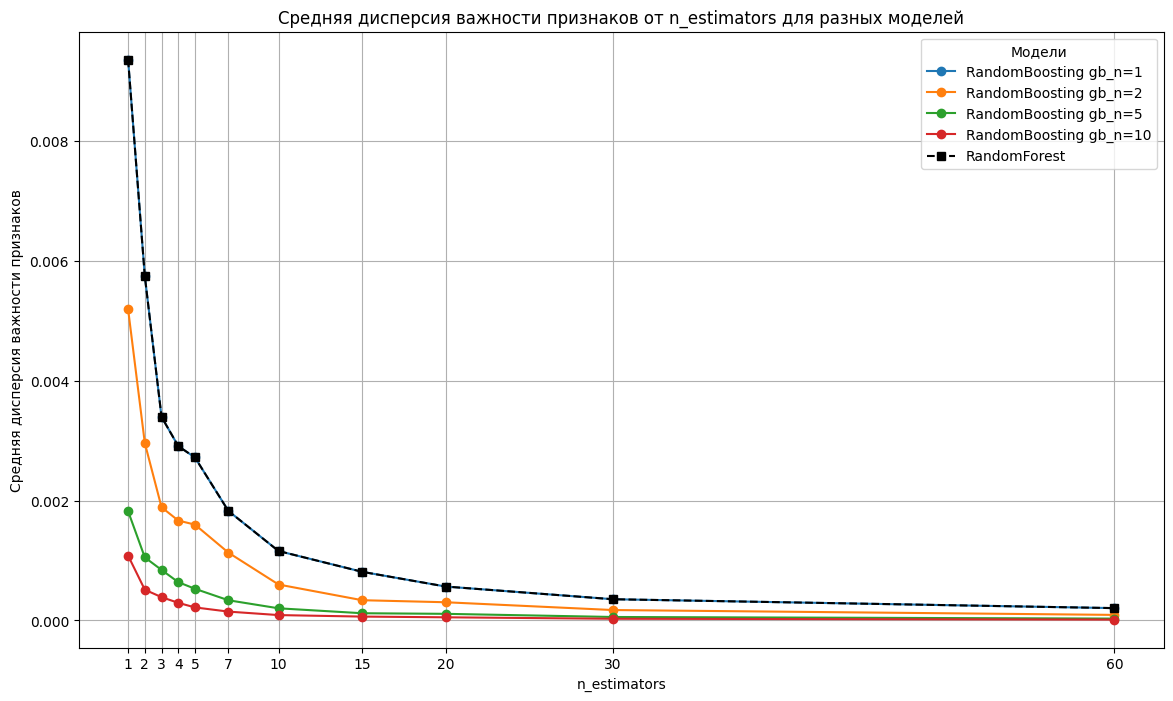

In [185]:
n_estimators_list = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 60]     
gb_n_estimators_list = [1, 2, 5, 10]      
random_seeds = range(20) 

average_variances = {gb_n: [] for gb_n in gb_n_estimators_list}
average_variances['RandomForest'] = []  

num_bars = len(gb_n_estimators_list) + 1  
pbar_dict = {}

for idx, gb_n in enumerate(gb_n_estimators_list):
    pbar_dict[gb_n] = tqdm(
        total=len(n_estimators_list), 
        desc=f'ForestBoosting gb_n={gb_n}', 
        position=idx, 
        leave=True, 
        unit='n_estimators'
    )
pbar_dict['RandomForest'] = tqdm(
    total=len(n_estimators_list), 
    desc='RandomForest', 
    position=len(gb_n_estimators_list), 
    leave=True, 
    unit='n_estimators'
)

for gb_n in gb_n_estimators_list:
    pbar = pbar_dict[gb_n]
    for n_estimators in n_estimators_list:
        importances_matrix = []
        for seed in random_seeds:
            rb = ForestBoostingClassifier(
                n_estimators=n_estimators,
                n_gb_estimators=gb_n,
                learning_rate=0.1,
                max_depth=3,
                max_features='sqrt',
                n_jobs=-1,
                random_state=seed
            ) 
        
            rb.fit(X_train, y_train)
            importances = rb.feature_importances_
            importances_matrix.append(importances)
        
        importances_matrix = np.array(importances_matrix)
        variances = np.var(importances_matrix, axis=0)
        average_variance = np.mean(variances)
        average_variances[gb_n].append(average_variance)
        pbar.set_postfix({'avg_var': f'{average_variance:.4f}'})
        pbar.update(1)

rf_pbar = pbar_dict['RandomForest']
for n_estimators in n_estimators_list:
    importances_matrix = []
    for seed in random_seeds:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=seed,
            max_depth=3,        
            max_features='sqrt',      
            n_jobs=-1
        )
        
        rf.fit(X_train, y_train)
        importances = rf.feature_importances_
        importances_matrix.append(importances)
    
    importances_matrix = np.array(importances_matrix)
    variances = np.var(importances_matrix, axis=0)
    average_variance = np.mean(variances)
    average_variances['RandomForest'].append(average_variance)
    rf_pbar.set_postfix({'avg_var': f'{average_variance:.4f}'})
    rf_pbar.update(1)

for pbar in pbar_dict.values():
    pbar.close()

# Создание DataFrame для построения графика
variance_df = pd.DataFrame(average_variances, index=n_estimators_list).reset_index()
variance_df = variance_df.rename(columns={'index': 'n_estimators'})

plt.figure(figsize=(14, 8))
for gb_n in gb_n_estimators_list:
    plt.plot(variance_df['n_estimators'], variance_df[gb_n], marker='o', linestyle='-', label=f'ForestBoosting gb_n={gb_n}')
plt.plot(variance_df['n_estimators'], variance_df['RandomForest'], marker='s', linestyle='--', color='black', label='RandomForest')
plt.title('Средняя дисперсия важности признаков от n_estimators для разных моделей')
plt.xlabel('n_estimators')
plt.ylabel('Средняя дисперсия важности признаков')
plt.xticks(n_estimators_list)
plt.legend(title='Модели', loc='upper right') 
plt.grid(True)
plt.show()

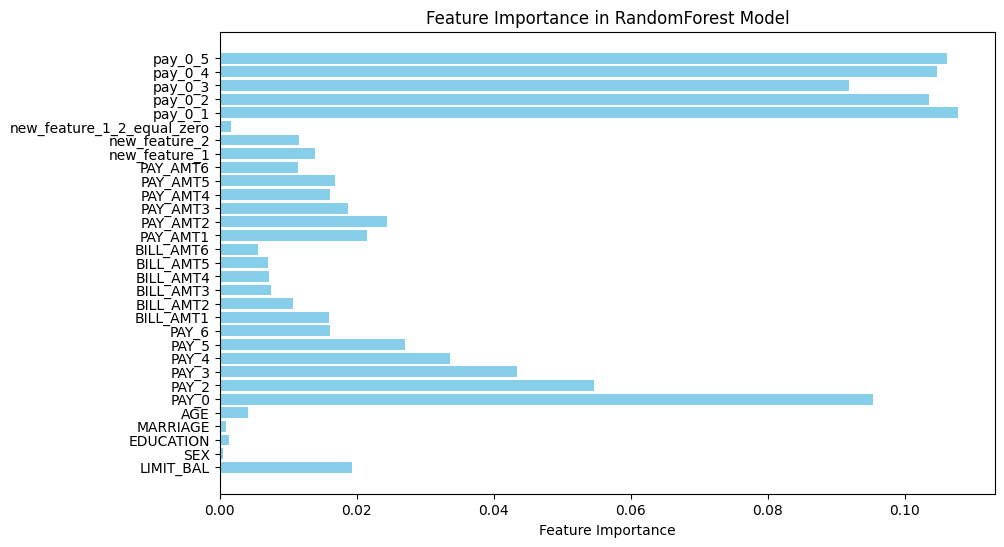

In [115]:
model = RandomForestClassifier(random_state=42, n_estimators=2000, max_depth = 5)
model.fit(X_train, y_train)

# Получим значимости признаков
feature_importances = model.feature_importances_

# Построим гистограмму значимости признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in RandomForest Model")
plt.show()

### Сходимость feature Importance ForestBoostingClassifier и RandomForestClassifier с увеличением числа деревьев  
max_depth=10  
max_features='sqrt' 
n_gb_estimators=3,
learning_rate=0.1

In [ ]:
rb = ForestBoostingClassifier(
    n_estimators=8000,
    n_gb_estimators=3,
    learning_rate=0.1,
    max_depth=10,
    max_features='sqrt',
    random_state=69,
    n_jobs=-1
)

rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances_rb = rb.feature_importances_
stds_rb = rb.feature_importances_std_

n_estimators = 8000
rf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1,
    random_state=69
)
rf.fit(X_train, y_train)
importances_rf_mean = rf.feature_importances_
importances_rf_all = np.array([tree.feature_importances_ for tree in rf.estimators_])
importances_rf = importances_rf_all.mean(axis=0)
variances_rf = importances_rf_all.var(axis=0)
stds_rf = np.sqrt(variances_rf / n_estimators)

# Убедимся, что порядок признаков совпадает
assert list(features) == list(X.columns), "Порядок признаков не совпадает!"

# Создание позиции для каждого признака
y_pos = np.arange(len(features))  # позиция на оси y
height = 0.35

# Настройка параметров отображения ошибок
error_kw = {'elinewidth': 2, 'ecolor': 'black', 'capsize': 5}

# Построение первого графика
fig, ax = plt.subplots(figsize=(10, 20))  # Изменили figsize для горизонтального графика

bars_rb = ax.barh(
    y_pos - height / 2, importances_rb, height, xerr=stds_rb,
    label='Ансамбль бустинга', color='skyblue', error_kw=error_kw
)
bars_rf = ax.barh(
    y_pos + height / 2, importances_rf, height, xerr=stds_rf,
    label='Случайный лес', color='salmon', error_kw=error_kw
)

ax.set_xlabel('Важность признака', fontweight='bold')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес', fontweight='bold')
ax.set_yticks(y_pos)
ax.set_yticklabels(features, fontweight='bold', fontsize=12)  # Устанавливаем жирный шрифт и размер меток оси y

ax.legend()

# деления по оси x жирным
ax.tick_params(axis='x', labelsize=12)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Добавление числовых значений рядом со столбцами с более жирным шрифтом
for i in range(len(features)):
    # Значения для ForestBoosting
    ax.text(
        importances_rb[i] + stds_rb[i] + 0.002,
        y_pos[i] - height / 2,
        f"{importances_rb[i]:.3f}",
        va='center', ha='left', fontsize=13, fontweight='bold'
    )
    # Значения для RF
    ax.text(
        importances_rf[i] + stds_rf[i] + 0.002,
        y_pos[i] + height / 2,
        f"{importances_rf[i]:.3f}",
        va='center', ha='left', fontsize=13, fontweight='bold'
    )

plt.tight_layout()

# Сохранение первого графика
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

# Создание DataFrame для удобства сортировки
importance_df = pd.DataFrame({
    'Feature': features,
    'Boosting': importances_rb,
    'Boosting_std': stds_rb,
    'RandomForest': importances_rf,
    'RandomForest_std': stds_rf
})

# Сортировка по важности RandomForest
importance_df = importance_df.sort_values(by='RandomForest', ascending=False)

# Обновление порядка признаков
sorted_features = importance_df['Feature'].values
importances_rb_sorted = importance_df['Boosting'].values
stds_rb_sorted = importance_df['Boosting_std'].values
importances_rf_sorted = importance_df['RandomForest'].values
stds_rf_sorted = importance_df['RandomForest_std'].values

# Обновление позиции на оси y
y_pos_sorted = np.arange(len(sorted_features))

# Построение второго графика с отсортированными признаками
fig, ax = plt.subplots(figsize=(10, 20))  # Изменили figsize для горизонтального графика

bars_rb = ax.barh(
    y_pos_sorted - height / 2, importances_rb_sorted, height, xerr=stds_rb_sorted,
    label='Ансамбль бустинга', color='skyblue', error_kw=error_kw
)
bars_rf = ax.barh(
    y_pos_sorted + height / 2, importances_rf_sorted, height, xerr=stds_rf_sorted,
    label='Случайный лес', color='salmon', error_kw=error_kw
)

ax.set_xlabel('Важность признака', fontweight='bold')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес (отсортировано)', fontweight='bold')
ax.set_yticks(y_pos_sorted)
ax.set_yticklabels(sorted_features, fontweight='bold', fontsize=12)  # Устанавливаем жирный шрифт и размер меток оси y

ax.legend()

# деления по оси x жирным
ax.tick_params(axis='x', labelsize=12)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Добавление числовых значений рядом со столбцами с более жирным шрифтом
for i in range(len(sorted_features)):
    ax.text(
        importances_rb_sorted[i] + stds_rb_sorted[i] + 0.002,
        y_pos_sorted[i] - height / 2,
        f"{importances_rb_sorted[i]:.3f}",
        va='center', ha='left', fontsize=13, fontweight='bold'
    )
    ax.text(
        importances_rf_sorted[i] + stds_rf_sorted[i] + 0.002,
        y_pos_sorted[i] + height / 2,
        f"{importances_rf_sorted[i]:.3f}",
        va='center', ha='left', fontsize=13, fontweight='bold'
    )

plt.tight_layout()

# Сохранение второго графика
plt.savefig('feature_importance_comparison_sorted.png', dpi=300, bbox_inches='tight')

plt.show()

# ForestBoostingRegressor

### загрузка датасета 

In [90]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Вырождение модели в случай одного дерева и сравнение с DecisionTreeRegressor

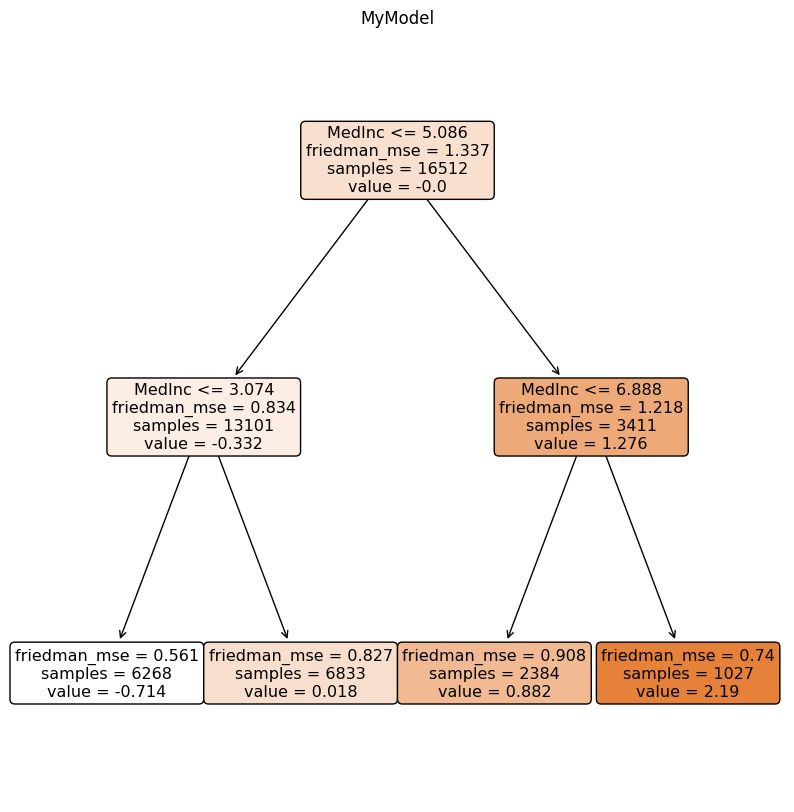

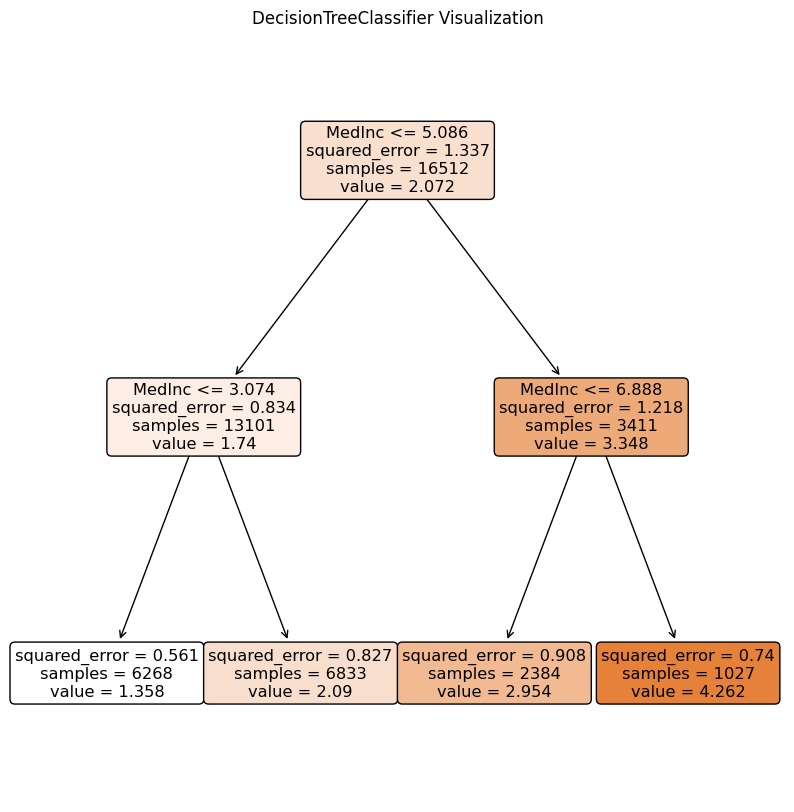

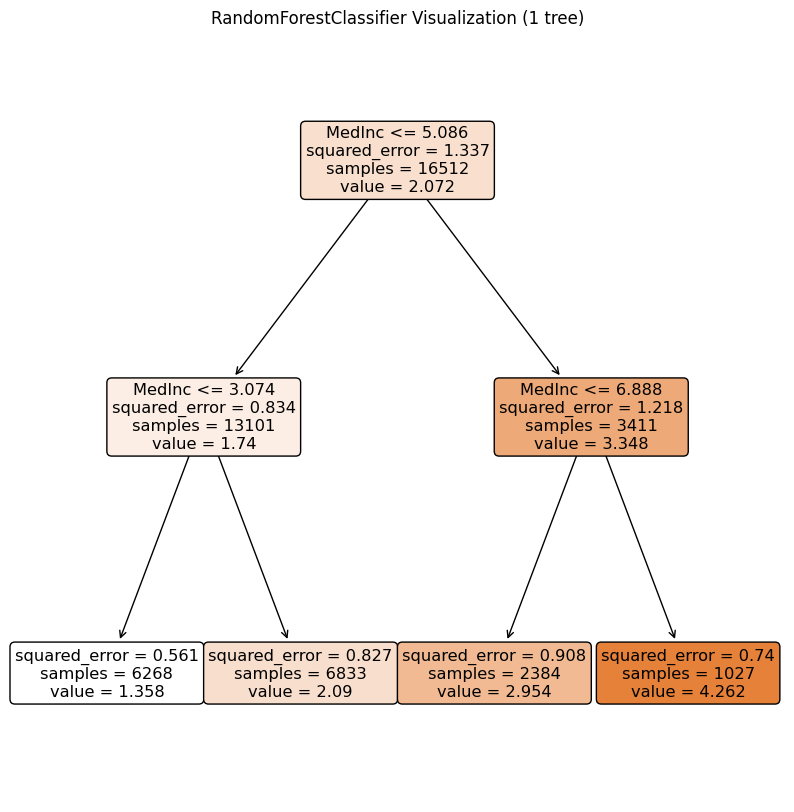

In [92]:
plt.figure(figsize=(10,10))
rbr = ForestBoostingRegressor( n_estimators  = 1 , n_gb_estimators = 1, learning_rate = 0.1, 
                              max_depth =  2, max_features =  1., random_state=69, bootstrap = False)  

rbr.fit(X_train, y_train)
selected_tree = rbr.estimators_[0].estimators_[0, 0] 
plot_tree(selected_tree, filled=True,feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()  


plt.figure(figsize=(10,10))
tree_clf = DecisionTreeRegressor(max_depth=2, max_features = 1., random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

plt.figure(figsize=(10,10))
rf = RandomForestRegressor(n_estimators = 1, max_depth=2, max_features = 1., bootstrap=False,  random_state=69)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True)
plt.title("RandomForestClassifier Visualization (1 tree)") 
plt.show()

### сравнение с RandomForestRegressor

In [93]:
rf_model = RandomForestRegressor(n_estimators = 30, max_depth = 3, max_features =1., bootstrap=False,  random_state=69)
rf_model.fit(X_train, y_train)
print('rf_mean_squared_error: ', mean_squared_error(y_test, rf_model.predict(X_test)) ) 

rb = ForestBoostingRegressor( n_estimators = 30, n_gb_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

rf_mean_squared_error:  0.6424109810265641
mean_squared_error rb:  0.6424109810265639


### сравнение с GradientBoostingRegressor

In [94]:
gb_model = GradientBoostingRegressor(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=69)
gb_model.fit(X_train, y_train)
print('mean_squared_error gb: ', mean_squared_error(y_test, gb_model.predict(X_test)) ) 

rb = ForestBoostingRegressor( n_estimators = 1 , n_gb_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

mean_squared_error gb:  0.29439838980729405
mean_squared_error rb:  0.294398389807294


### GridSearchCV 

In [ ]:
rb_regressor = ForestBoostingRegressor(random_state=42)

param_grid = {
    'max_features': [0.2, 0.5, 0.7, 1.0],
    'n_estimators': [30],
    'n_gb_estimators': [10, 20, 50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
}

scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(
    estimator=rb_regressor,
    param_grid=param_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,  
    verbose=2
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)

print("\nЛучший MSE на кросс-валидации:")
best_mse = -grid_search.best_score_
print(f"{best_mse:.4f}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\nОценка лучшей модели на тестовых данных:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_MSE'] = -results['mean_test_score']
print("\nДоступные параметры для pivot_table:")
print(results.columns)

pivot_table = results.pivot_table(
    values='mean_test_MSE',
    index='param_n_gb_estimators',       
    columns='param_max_features'         
)

print("\nСводная таблица MSE:")
print(pivot_table)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Зависимость MSE от n_gb_estimators и max_features")
plt.xlabel("max_features")
plt.ylabel("n_gb_estimators")
plt.show()

# Adjusted Forest 

In [38]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from adjusted_forest import get_adjusted_forest

df = pd.read_csv('/home/alange/Sber_causal/UCI_Credit_Card.csv')
y = df['default.payment.next.month']
X = df.drop(['default.payment.next.month', 'ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, random_state=0) 

## Default settings

/tmp/ipykernel_4165212/4053478675.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


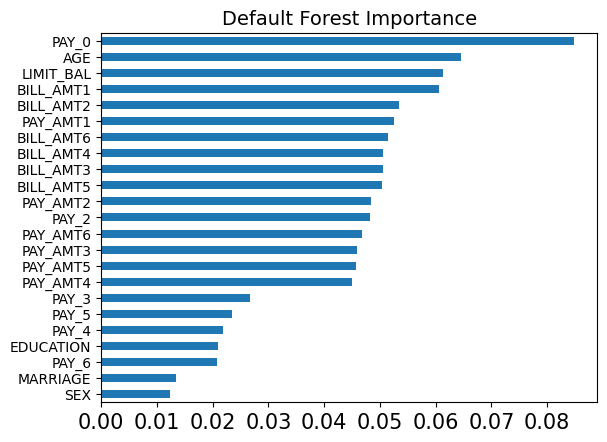

/tmp/ipykernel_4165212/4053478675.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


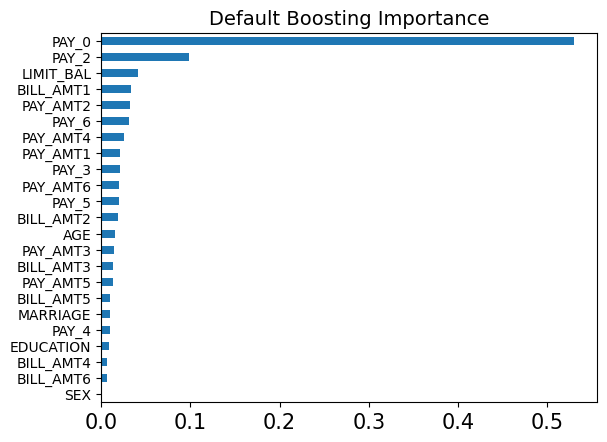

In [40]:
rf_default=RandomForestClassifier()
rf_default.fit(X_train, y_train)
plt.figure()
pd.Series(rf_default.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Default Forest Importance', fontsize=14)
plt.show()

gb_default=GradientBoostingClassifier()
gb_default.fit(X_train, y_train)
plt.figure()
pd.Series(gb_default.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Default Boosting Importance', fontsize=14)
plt.show()

## Econom Settings

{'max_depth': 6, 'n_estimators': 30}

0.7674970683884681

[({'max_depth': 5, 'n_estimators': 30}, 0.7665690152093794),
 ({'max_depth': 6, 'n_estimators': 30}, 0.7674970683884681),
 ({'max_depth': 7, 'n_estimators': 30}, 0.7669180795063522),
 ({'max_depth': 8, 'n_estimators': 30}, 0.7663250132270418),
 ({'max_depth': 9, 'n_estimators': 30}, 0.76568672598477)]

/tmp/ipykernel_4165212/4061096475.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


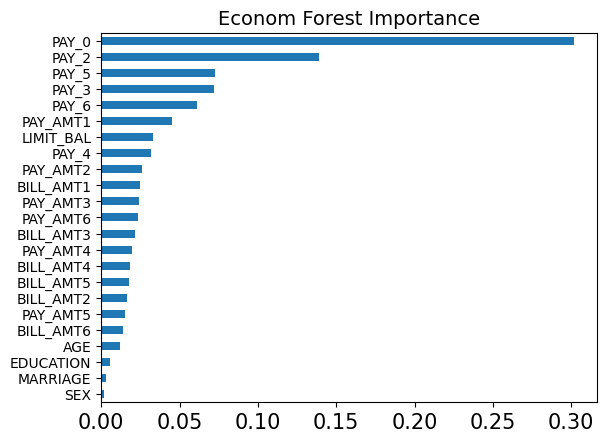

{'learning_rate': 1e-05, 'max_depth': 7, 'n_estimators': 30}

0.7707659205054667

[({'learning_rate': 1e-06, 'max_depth': 6, 'n_estimators': 30},
  0.7684007344998927),
 ({'learning_rate': 1e-06, 'max_depth': 7, 'n_estimators': 30},
  0.770623340901916),
 ({'learning_rate': 1e-06, 'max_depth': 8, 'n_estimators': 30},
  0.7672978262328409),
 ({'learning_rate': 1e-05, 'max_depth': 6, 'n_estimators': 30},
  0.7684216457922088),
 ({'learning_rate': 1e-05, 'max_depth': 7, 'n_estimators': 30},
  0.7707659205054667),
 ({'learning_rate': 1e-05, 'max_depth': 8, 'n_estimators': 30},
  0.766962424421845),
 ({'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 30},
  0.7689247383460722),
 ({'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 30},
  0.770109002594685),
 ({'learning_rate': 0.0001, 'max_depth': 8, 'n_estimators': 30},
  0.7655725689468306)]

/tmp/ipykernel_4165212/4061096475.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


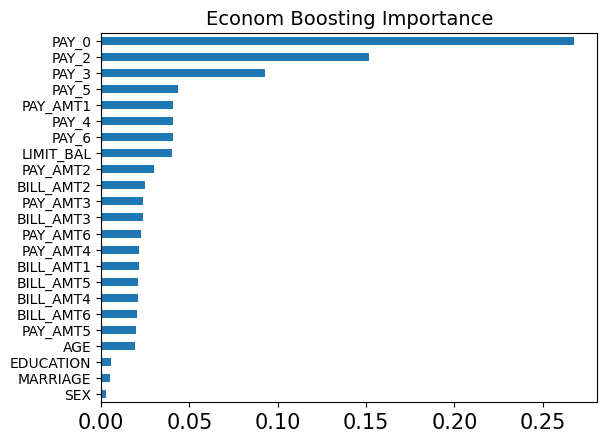

In [42]:
params = {'max_depth': [5, 6, 7, 8, 9], 'n_estimators': [30]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(random_state=0,
                                          max_features='sqrt', 
                                          bootstrap=True),
                                          params, cv=2, scoring='roc_auc')
clf.fit(X_train, y_train)
display(clf.best_params_, clf.best_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(
    clf.best_estimator_.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Econom Forest Importance', fontsize=14)
plt.show()
rf_econom = clf.best_estimator_

params = {
    'max_depth': [6, 7, 8], 
    'learning_rate': [1e-6, 1e-5, 1e-4],
    'n_estimators': [30]
}
clf = GridSearchCV(GradientBoostingClassifier(random_state=0,
                                              max_features='sqrt', 
                                              subsample=1-np.exp(-1)),
                                              params, cv=2, scoring='roc_auc')
clf.fit(X_train, y_train)
display(clf.best_params_, clf.best_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(
    clf.best_estimator_.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Econom Boosting Importance', fontsize=14)
plt.show()
gb_econom = clf.best_estimator_

## Tuned Settings

### Tuned Random Forest

{'max_depth': 7, 'n_estimators': 250}

0.7714070973599905

[({'max_depth': 5, 'n_estimators': 250}, 0.7690207726223731),
 ({'max_depth': 6, 'n_estimators': 250}, 0.7697946450731568),
 ({'max_depth': 7, 'n_estimators': 250}, 0.7714070973599905),
 ({'max_depth': 8, 'n_estimators': 250}, 0.7714021714352908),
 ({'max_depth': 9, 'n_estimators': 250}, 0.7705488400217673)]

/tmp/ipykernel_4165212/1681631808.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


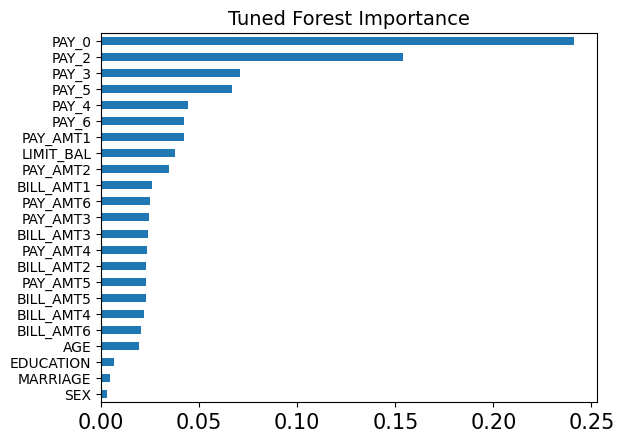

/tmp/ipykernel_4165212/1681631808.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


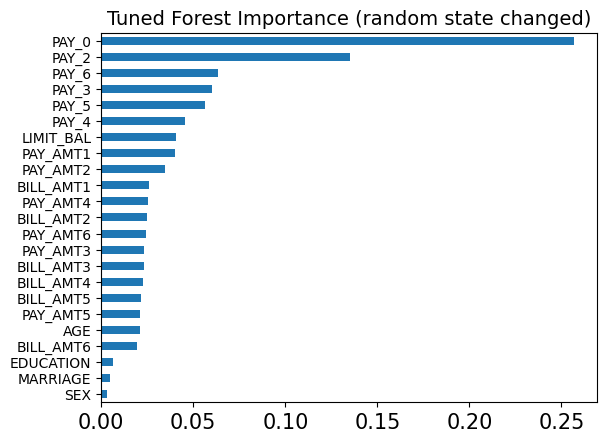

In [45]:
params = {'max_depth': [5, 6, 7, 8, 9], 'n_estimators': [250]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(random_state=0,
                                          max_features='sqrt', 
                                          bootstrap=True),
                                          params, cv=2, scoring='roc_auc')
clf.fit(X_train, y_train)
display(clf.best_params_, clf.best_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(
    clf.best_estimator_.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Tuned Forest Importance', fontsize=14)
plt.show()
rf_tuned = clf.best_estimator_

params = clf.best_params_
params.update({
    'random_state':42,
    'max_features': 'sqrt',
    'bootstrap': True})
rf_tuned2 = RandomForestClassifier().set_params(**params)
rf_tuned2.fit(X_train, y_train)
plt.figure()
pd.Series(
    rf_tuned2.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Tuned Forest Importance (random state changed)', fontsize=14)
plt.show()

## Tuned Gradient Boosting

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}

0.7731664832654568

[({'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 200},
  0.7662086606961811),
 ({'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 250},
  0.7664698394052969),
 ({'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 300},
  0.7666376478921992),
 ({'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 200},
  0.7687201799326393),
 ({'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 250},
  0.7691916381919963),
 ({'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 300},
  0.7691630546653354),
 ({'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 200},
  0.7702262213579447),
 ({'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 250},
  0.7705131572164661),
 ({'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 300},
  0.7705840966356924),
 ({'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200},
  0.7710587819352569),
 ({'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250},
  0.7718637411015137),
 ({'learning_rate': 0.01, 'max_dep

/tmp/ipykernel_4165212/3128034032.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


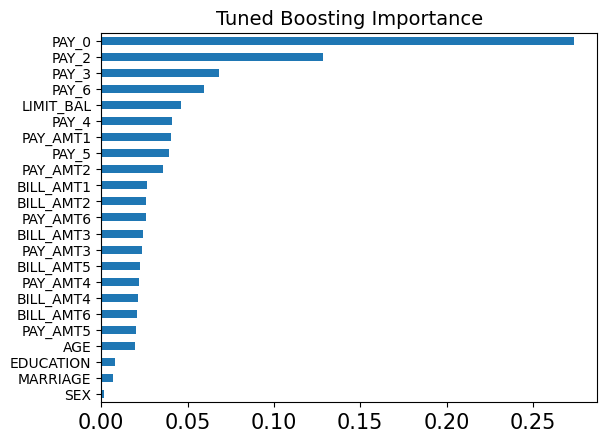

/tmp/ipykernel_4165212/3128034032.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


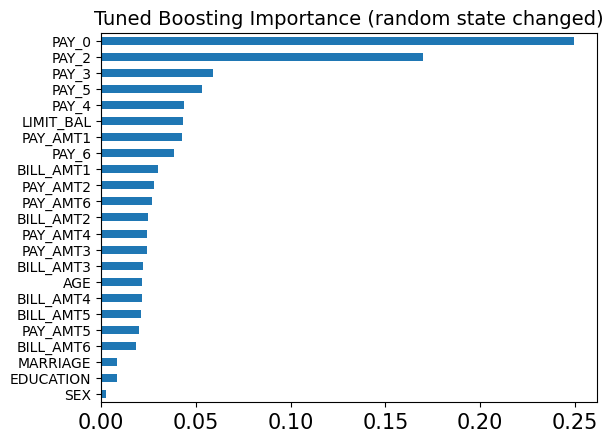

In [47]:
params = {
    'max_depth': [4, 5, 6], 
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [200, 250, 300]
}
clf = GridSearchCV(GradientBoostingClassifier(random_state=0,
                                              max_features='sqrt', 
                                              subsample=1-np.exp(-1)),
                                              params, cv=2, scoring='roc_auc')
clf.fit(X_train, y_train)
display(clf.best_params_, clf.best_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(
    clf.best_estimator_.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Tuned Boosting Importance', fontsize=14)
plt.show()
gb_tuned = clf.best_estimator_

params = clf.best_params_
params.update({
    'random_state':42,
    'max_features': 'sqrt',
    'subsample': 1-np.exp(-1)})
gb_tuned2 = GradientBoostingClassifier().set_params(**params)
gb_tuned2.fit(X_train, y_train)
plt.figure()
pd.Series(
    gb_tuned2.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Tuned Boosting Importance (random state changed)', fontsize=14)
plt.show()

## Instability and Score

In [49]:
adj_rf_default, relevant_features = get_adjusted_forest(
    rf_default, X_train, y_train, verb=1)

adj_rf_econom, relevant_features = get_adjusted_forest(
    rf_econom, X_train, y_train, verb=1)

adj_rf_tuned, relevant_features = get_adjusted_forest(
    rf_tuned, X_train, y_train, verb=1)


adj_gb_default, relevant_features = get_adjusted_forest(
    gb_default, X_train, y_train, verb=1)

adj_gb_econom, relevant_features = get_adjusted_forest(
    gb_econom, X_train, y_train, verb=1)

adj_gb_tuned, relevant_features = get_adjusted_forest(
    gb_tuned, X_train, y_train, verb=1)

n_trees: 100 instability: 0.15193662219058976 
n_trees: 30 instability: 0.2425507215452185 
n_trees: 250 instability: 0.10814604142192275 
n_trees: 100 instability: 0.20923452095831094 
n_trees: 30 instability: 0.2936409116303824 
n_trees: 250 instability: 0.1845273849550826 


## Adjusted Forest

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from adjusted_forest import get_adjusted_forest

df = pd.read_csv('/home/alange/Sber_causal/UCI_Credit_Card.csv')
y = df['default.payment.next.month']
X = df.drop(['default.payment.next.month', 'ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=10000, random_state=0)

params = {'max_depth': [5, 6, 7, 8, 9], 'n_estimators': [30]}
clf = GridSearchCV(RandomForestClassifier(random_state=0, 
                                          max_features='sqrt', bootstrap=True),
                   params, cv=2, scoring='roc_auc')
clf.fit(X_train, y_train)
rf_econom = clf.best_estimator_

adj_rf_econom, relevant_features = get_adjusted_forest(
    rf_econom, X_train, y_train, 
    max_n_estimators=1000, thresh=0.05, verb=1)


n_trees: 30 instability: 0.2425507215452185 
n_trees: 31 instability: 0.21842248395386912 
n_trees: 32 instability: 0.2431082130754469 
n_trees: 33 instability: 0.22518243565286264 
n_trees: 34 instability: 0.2372579894069458 
n_trees: 35 instability: 0.2629566161907036 
n_trees: 36 instability: 0.24171271608775047 
n_trees: 37 instability: 0.22207002904501202 
n_trees: 38 instability: 0.23661194257366447 
n_trees: 39 instability: 0.24880555871697874 
n_trees: 40 instability: 0.22701220452495505 
n_trees: 41 instability: 0.21014658778445774 
n_trees: 42 instability: 0.232777523685073 
n_trees: 43 instability: 0.24710138901850726 
n_trees: 44 instability: 0.23884890146119506 
n_trees: 45 instability: 0.23308943827457954 
n_trees: 46 instability: 0.20516660450300986 
n_trees: 47 instability: 0.20294189886468653 
n_trees: 48 instability: 0.21839855742038033 
n_trees: 49 instability: 0.20047569949787197 
n_trees: 50 instability: 0.1878334942746697 
n_trees: 51 instability: 0.18837447786740

n_trees: 999 instability: 0.05772391686981872 


/tmp/ipykernel_4165212/2195502372.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


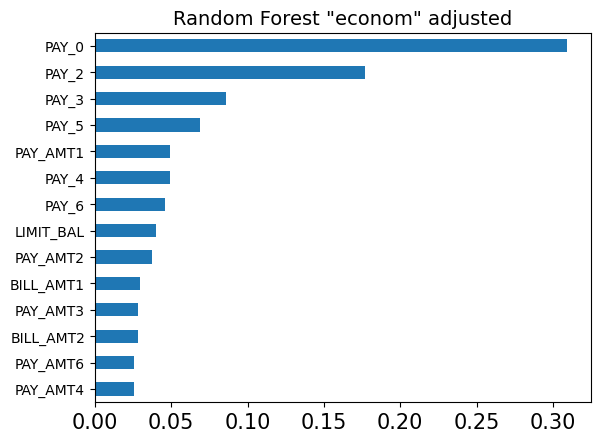

In [52]:
adj_rf_econom, relevant_features = get_adjusted_forest(
    rf_econom, X_train, y_train, 
    max_n_estimators=1000, thresh=0.05, verb=1)
plt.figure()
pd.Series(   
    adj_rf_econom.feature_importances_, 
    index=X_train.columns[relevant_features]
).sort_values(ascending=True).plot(kind='barh')

xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Random Forest "econom" adjusted', fontsize=14)
plt.show()

n_trees: 250 instability: 0.10814604142192275 
n_trees: 251 instability: 0.11342106576331355 
n_trees: 252 instability: 0.10989625196105472 
n_trees: 253 instability: 0.10177757264073221 
n_trees: 254 instability: 0.10136611453946884 
n_trees: 255 instability: 0.09603027816420494 
n_trees: 256 instability: 0.09682627714565756 
n_trees: 257 instability: 0.0977537541651609 
n_trees: 258 instability: 0.09305185028526429 
n_trees: 259 instability: 0.08724734089399781 
n_trees: 260 instability: 0.08434999756960565 
n_trees: 261 instability: 0.07988603760441888 
n_trees: 262 instability: 0.07731075122969538 
n_trees: 263 instability: 0.07904276010855556 
n_trees: 264 instability: 0.0800041233405044 
n_trees: 265 instability: 0.0815315092815539 
n_trees: 266 instability: 0.07924150292212527 
n_trees: 267 instability: 0.0768372990284005 
n_trees: 268 instability: 0.07750210689473604 
n_trees: 269 instability: 0.07835312499409502 
n_trees: 270 instability: 0.08333585346340228 
n_trees: 271 inst

/tmp/ipykernel_4165212/3577530834.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


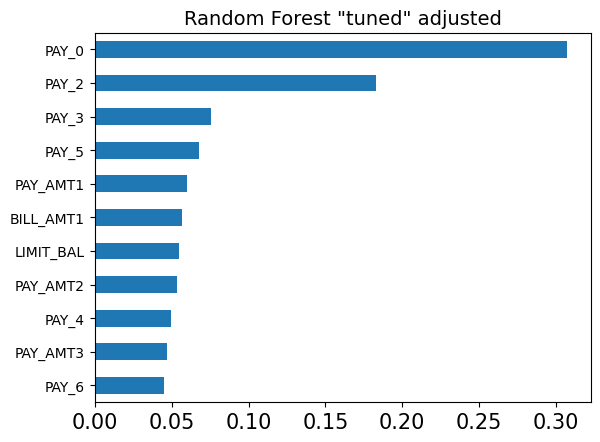

In [53]:
adj_rf_tuned, relevant_features = get_adjusted_forest(
    rf_tuned, X_train, y_train, 
    max_n_estimators=1000, thresh=0.05, verb=1)
plt.figure()
pd.Series(   
    adj_rf_tuned.feature_importances_, 
    index=X_train.columns[relevant_features]
).sort_values(ascending=True).plot(kind='barh')

xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('Random Forest "tuned" adjusted', fontsize=14)
plt.show()